# Lead Scoring Case Study

Developing a logistic regression model to identify potential leads for the company and facilitate the attainment of specific targets. Ensure readiness for alternative approaches to accommodate any future changes in the company's requirements and maintain flexibility.


---



**Steps to follow:**

1. Reading and comprehending the data
2. Data cleaning
3. Data preparation for model building
4. Building the model
5. Evaluating the model
6. Making predictions on the test set

### Importing libraries and Supressing Warnings


In [ ]:
# Importing needed libraries
import numpy as np
import pandas as pd

  # For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

  # To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

  # For Standardisation & Scaling
from sklearn.preprocessing import StandardScaler

  # For building logistic regression model
import statsmodels.api as sm

  # Import RFE for feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

  # For checking VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

  # Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import time, warnings
import datetime as dt

pd.set_option("display.max_columns",500)

In [ ]:
# To supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')



---


### Reading and understanding the Dataset

In [ ]:
# Importing dataset 'Leads'
leads_df=pd.read_csv("Leads.csv")

In [ ]:
# Getting the shape (row and column count) of the dataset
leads_df.shape

(9240, 37)

In [ ]:
# Getting  the columns wise info - Datatypes and missing values
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Many columns have a lot of null values. These null values need to be managed.

In [ ]:
# Checking the sample values using df.head()
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# Checking the sample values using df.tail()
leads_df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [ ]:
# Inspecting the different columns in the dataset
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
# Checking the statistical summary of dataset
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Based on the provided information, the dataset contains several categorical variables that require the creation of dummy variables. Additionally, there is a substantial presence of null values that necessitate appropriate treatment. The columns 'TotalVisits', 'Total Time Spent on Website', and 'Page Views Per Visit' exhibit outliers due to a substantial difference between their minimum and maximum values. We will confirm this through Exploratory Data Analysis (EDA) at a later stage.


In [ ]:
# Reviewing for duplicates and eliminating the entire duplicated row, if found
leads_df.drop_duplicates(subset=None, inplace=True)

In [ ]:
# Checking shape after dropping duplicates
leads_df.shape

(9240, 37)

There are no duplicate rows in the dataset.

#### Managing the columns with values as 'Select'

In [ ]:
# Finding the columns that have 'Select' Value
cols=list(leads_df.columns)
for i in cols:
    if 'Select' in leads_df[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


The columns 'Specialization', 'How did you hear about X Education', 'Lead Profile', and 'City' contain the value 'Select', indicating that the customer did not choose an option while filling out the form. It is advisable to replace these instances with 'Null' values.

In [ ]:
# Imputing 'Select' value with 'NaN'
leads_df = leads_df.replace('Select', np.nan)

In [ ]:
# Rechecking 'Select' values after computation
cols=list(leads_df.columns)
for i in cols:
    if 'Select' in leads_df[i].values:
        print(i)

#### Checking Null/Missing values

In [ ]:
# Checking null values column wise
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
#Checking percentage of missing/null values
round(100*(leads_df.isnull().sum()/len(leads_df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 


Checking the columns with more than 40% missing values:
- The columns 'Asymmetrique Activity Index,' 'Asymmetrique Profile Index,' 'Asymmetrique Activity Score,' and 'Asymmetrique Profile Score' exhibit approximately 45% null values. Given that these columns are assigned by the sales team after calls and hold no analytical value, they can be safely dropped.

- Both 'How did you hear about X Education' and 'Lead Profile' contain over 70% missing values, making it advisable to remove them from the analysis.

- Similarly, 'Lead Quality' has around 51% missing values and can be dropped.

#### Managing columns with missing values

In [ ]:
# Adding the columns with more than 40% null values in new variable
col_drop = leads_df.columns[100*(leads_df.isnull().sum()/len(leads_df)) > 40]
print(col_drop)

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')


All the columns with more than 40% null values are of no importance. Hence, dropping them.

In [ ]:
# Dropping the columns listed in 'col_drop'
leads_df = leads_df.drop(col_drop, axis=1)

In [ ]:
# Checking dimension after dropping columns
leads_df.shape

(9240, 30)

After dropping 7 columns, the dataset has 30 columns.

Checking the null value percentage again of the remaining columns to impute these null values.

In [ ]:
# Finding the null percentages across columns after removing the above columns
round(leads_df.isnull().sum()/len(leads_df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          



---



##### Checking other columns for missing values

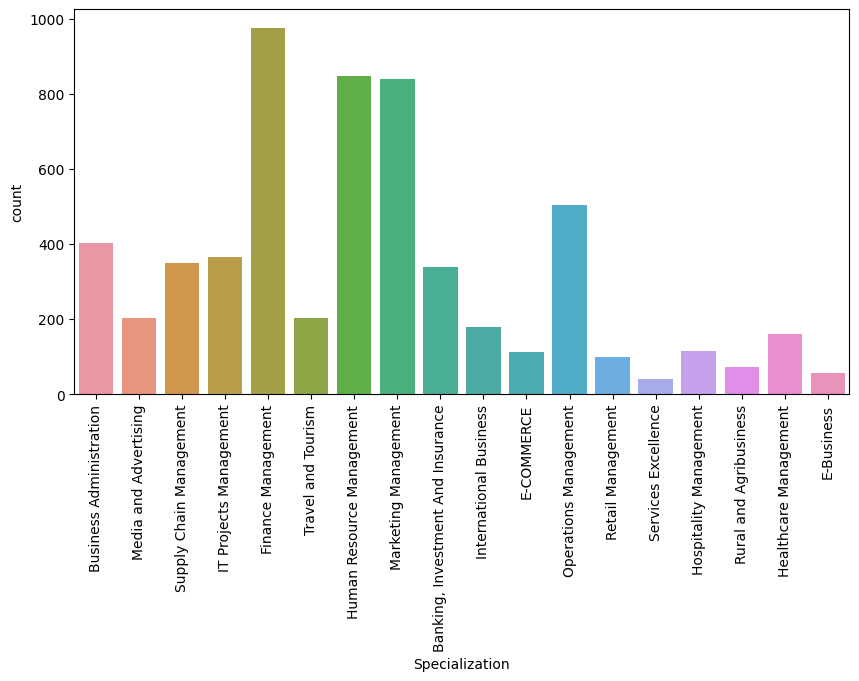

In [ ]:
# Creating a count plot for 'Specialization' to visualize the distribution of data.
# It's important to note that this column has 37% missing values.

plt.figure(figsize=(10,5))
sns.countplot(x='Specialization', data=leads_df)
plt.xticks(rotation=90)
plt.show()

The 'Specialization' column contains 37% missing values. It's plausible that leads may leave this column blank if they are students, lack a specialization, or if their specialization is not among the provided options. To address this, we can introduce a new category, 'Others.'

In [ ]:
# Imputing missing value with 'Other' :-
leads_df['Specialization'].fillna('Other',inplace=True)

Analyzing columns with Null values less than 30%

In [ ]:
# Compiling a list of columns with null values less than 30% but more than 0% and storing them in the variable 'leads_null'

leads_null = leads_df.columns[(100*(leads_df.isnull().sum()/len(leads_df)) < 30) & (100*(leads_df.isnull().sum()/len(leads_df)) >0) ]
print(leads_null)

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')


Now, checking each column for null values:

1. 'Lead Source'

In [ ]:
# Checking value counts of 'Lead Source'
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Upon inspecting the dataset, it was noted that there are instances where the source is recorded as both 'Google' and 'google.' To ensure uniformity, it is advised to standardize the entries by replacing 'google' with 'Google.'

Considering the predominance of 'Google' as the most frequently occurring source, it is proposed to impute missing values in the relevant column with 'Google' for the sake of consistency and optimal data representation. This approach aims to enhance the overall quality and coherence of the dataset.

In [ ]:
# Replacing 'google' with 'Google' :-
leads_df['Lead Source']=leads_df['Lead Source'].replace('google','Google')

In [ ]:
# Verifying value counts again
leads_df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

Given that 'Google' has the highest frequency of entries among the available options, opting to replace null values with 'Google' appears to be the most suitable approach.

In [ ]:
# Imputing missing values with 'Google':-
leads_df['Lead Source'].fillna('Google',inplace=True)

2. 'TotalVisits', 'Page Views Per Visit' and 'Last Activity'

'TotalVisits', 'Page Views Per Visit' and 'Last Activity' have about 1% null values. Let's impute these missing values as required.

In [ ]:
# Checking the statistical summary of 'TotalVisits' and 'Page Views Per Visit'
leads_df[['TotalVisits', 'Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [ ]:
# Filling in the missing values with the 'median' value for both the 'TotalVisits' and 'Page Views Per Visit' columns

leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].median(), inplace=True)

leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].median(), inplace=True)

In [ ]:
# Checking value counts of 'Last Activity'
leads_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Since the last activity of leads with missing values is unknown, and the most frequently occurring value is 'Email Opened,' it is reasonable to impute the missing values with 'Email Opened'.

In [ ]:
# Imputing missing values with 'Email Opened':-
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan, 'Email Opened')


3. 'What is your current occupation'

This column has about 29% null values. Imputing them as required.


In [ ]:
# Inspecting the value counts in the 'What is your current occupation' column
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

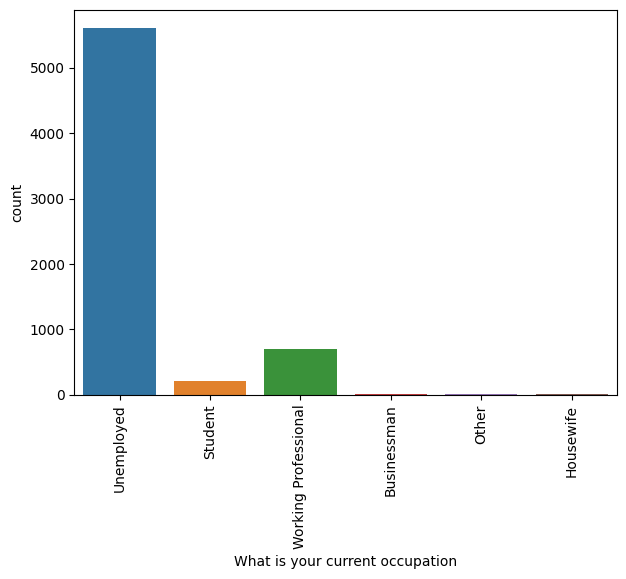

In [ ]:
# Creating a count plot to visualize the distribution of data counts in the 'What is your current occupation' column
plt.figure(figsize=(7,5))
sns.countplot(x='What is your current occupation', data=leads_df)
plt.xticks(rotation=90)
plt.show()

Observing that the count for 'Unemployed' is the highest, but in order to address missing values and the uncertainty about the current occupation of the lead, it is decided to impute missing values with 'Other'.

In [ ]:
# Imputing missing value with 'Other'
leads_df['What is your current occupation'].fillna('Other',inplace=True)

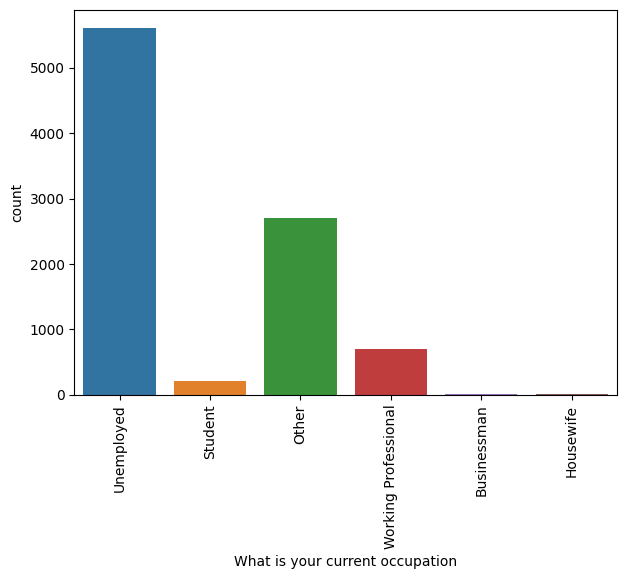

In [ ]:
# Checking count of 'Other' after impuataion:-
plt.figure(figsize=(7,5))
sns.countplot(x='What is your current occupation', data=leads_df)
plt.xticks(rotation=90)
plt.show()

4. 'What matters most to you in choosing a course'

This column has about 29% null values.

In [ ]:
# Checking value count of 'What matters most to you in choosing a course' column
leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Given that 'Better Career Prospects' is the most frequently occurring value, it is recommended to replace missing values with 'Better Career Prospects.'

In [ ]:
# Imputing null value with 'Better Career Prospects'
leads_df['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

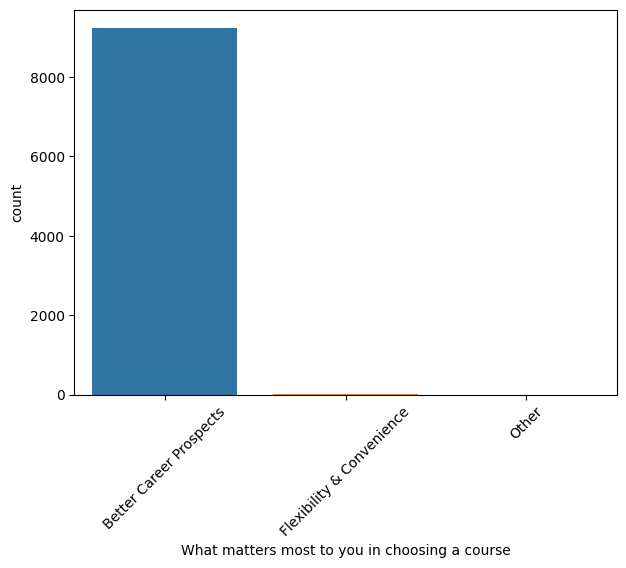

In [ ]:
# Verifying counts by count plot
plt.figure(figsize=(7,5))
sns.countplot(x='What matters most to you in choosing a course', data=leads_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculating the percentage distribution of various categories within this column
round(leads_df['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

Observing that this column is highly skewed, it is advisable to eliminate it from the dataset.

In [ ]:
# Dropping this column
leads_df=leads_df.drop('What matters most to you in choosing a course',axis=1)

5. 'Country'

This column has 27% null values.

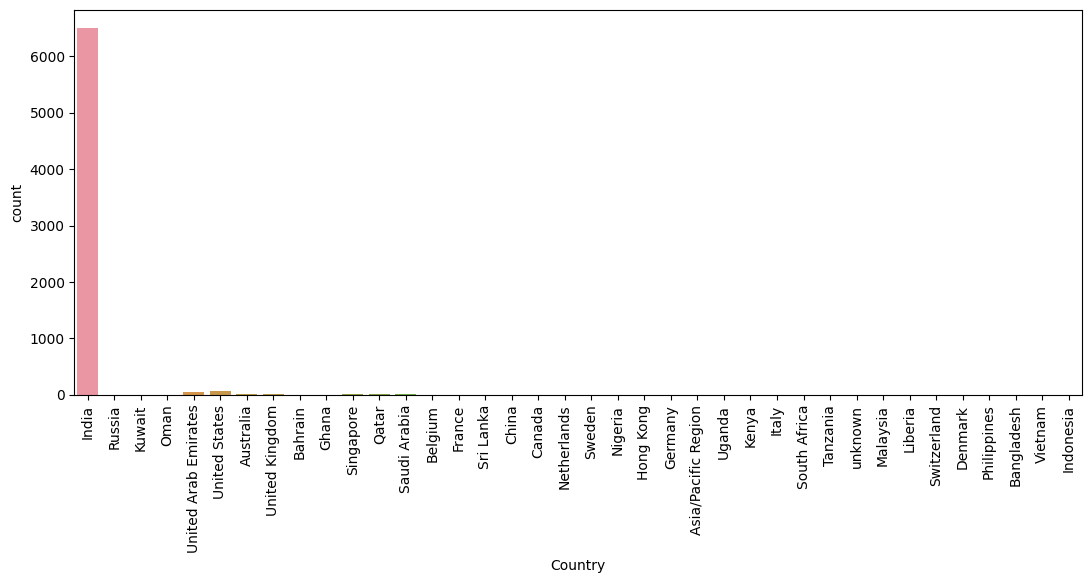

In [ ]:
# Creating a count plot to visually represent the distribution of data counts in the 'Country' column
plt.figure(figsize=(13,5))
sns.countplot(x='Country', data=leads_df)
plt.xticks(rotation=90)
plt.show()

Noting the high skewness in this column, it's crucial information regarding the lead. Given that the majority of values are 'India', it is suggested to impute missing values in this column with the same value for consistency and to preserve the significance of this information.

In [ ]:
# Replacing the null values in the 'Country' column with 'India'
leads_df['Country']=leads_df['Country'].replace(np.nan,'India')

6. 'City'

This column has 40% null values.

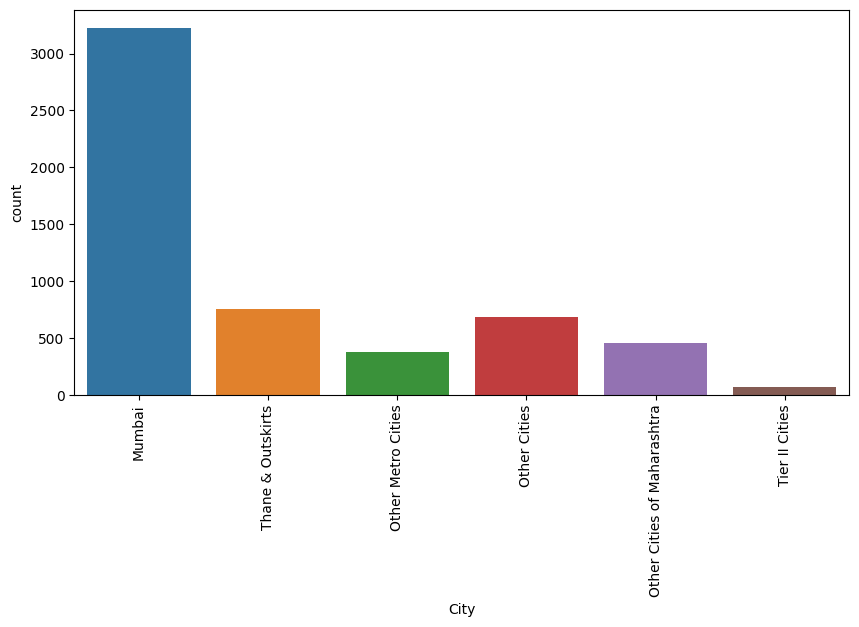

In [ ]:
# Creating a count plot to visually represent the distribution of data counts in the 'City' column
plt.figure(figsize=(10,5))
sns.countplot(x='City', data=leads_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Finding the percentage of the different values in this column
round(leads_df['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

Considering that the majority of values are 'Mumbai', it is recommended to fill in missing values in this column with 'Mumbai' for consistency.

In [ ]:
# Imputing the missing data in the 'City' column with 'Mumbai'
leads_df['City']=leads_df['City'].replace(np.nan,'Mumbai')

Currently, the only column containing null values is 'Tags', which accounts for approximately 36% of the dataset. Let's proceed to handle and resolve issues related to this specific column.

7. 'Tags'

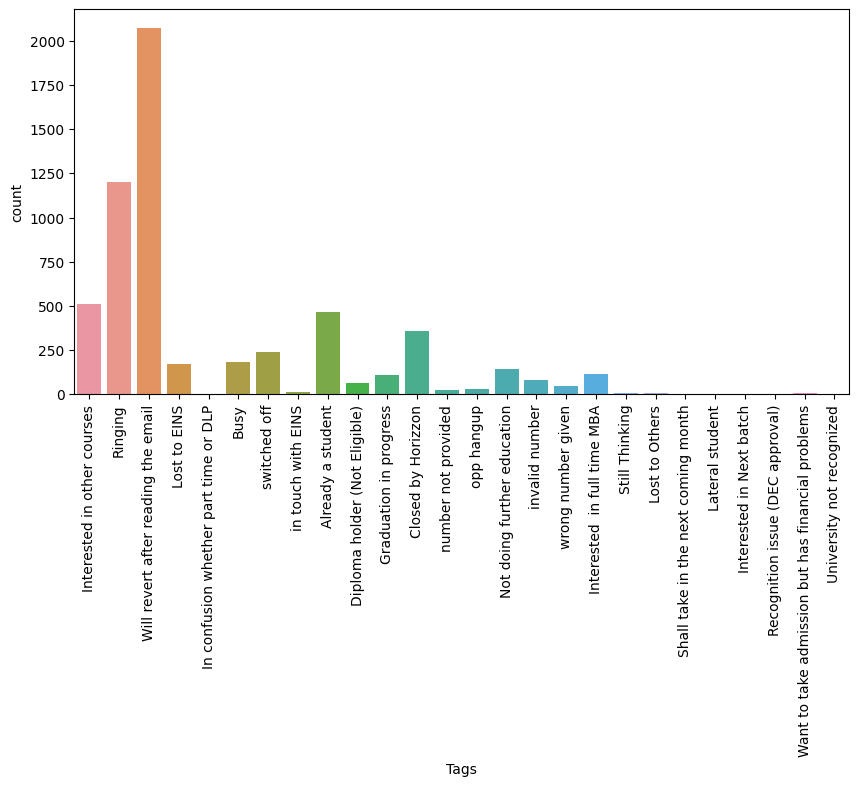

In [ ]:
# Visualizing 'Tags' column
plt.figure(figsize=(10,5))
sns.countplot(x='Tags', data=leads_df)
plt.xticks(rotation=90)
plt.show()

As the majority of values are 'Will revert after reading the email,' it is recommended to fill in the missing values in this column with the same value for consistency.

In [ ]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
leads_df['Tags']=leads_df['Tags'].replace(np.nan,'Will revert after reading the email')

In [ ]:
# Finding the null percentages across columns after imputation
round(leads_df.isnull().sum()/len(leads_df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Observing that there are no longer any missing values, we can proceed with the next task.

8. Checking 'Prospect ID' and 'Lead Number' columns

In [ ]:
# Inspecting duplicate values in the 'Prospect ID' column
leads_df.duplicated(subset = 'Prospect ID').sum()

0

In [ ]:
# Inspecting duplicate values in the 'Lead Number' column
leads_df.duplicated(subset = 'Lead Number').sum()

0

'Prospect ID' and 'Lead Number' both exhibit no duplicate values, signifying that these columns serve as unique identifiers for each piece of data. As such, their presence does not contribute significantly to our model, and we can safely drop them.

In [ ]:
# Dropping 'Prospect ID' and 'Lead Number' columns
leads_df.drop(['Prospect ID','Lead Number'],1,inplace=True)

In [ ]:
# Verifying the shape of the dataframe after addressing missing values
leads_df.shape

(9240, 27)

Now, the dataset has 27 columns with no null values. The data is not clean and can be used for Exploratory Data Anaysis.

---



### Exploratory Data Anaysis

According to the problem statement, our target variable is 'Converted.' This variable signifies whether a lead has been successfully converted or not, with the following encoding:
- 0: Not converted into a lead.
- 1: Lead has been successfully converted.



---



Identifying continous and categorical columns

In [ ]:
# checking the number of unique values is the columns
leads_df.nunique().sort_values()

Magazine                                       1
I agree to pay the amount through cheque       1
Get updates on DM Content                      1
Update me on Supply Chain Content              1
Receive More Updates About Our Courses         1
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
Through Recommendations                        2
Digital Advertisement                          2
Newspaper                                      2
X Education Forums                             2
Search                                         2
A free copy of Mastering The Interview         2
Newspaper Article                              2
Lead Origin                                    5
City                                           6
What is your current occupation                6
Last Notable Activity                         16
Last Activity                                 17
Specialization      

Based on the count of unique values in each column, it can be inferred that 'TotalVisits,' 'Page Views Per Visit,' and 'Total Time Spent on Website' are numerical columns, while the rest are categorical.

#### Univariate Analysis

Univariate Analysis of each column of dataset:

1. Converted

In [ ]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

38.53896103896104

The lead conversion rate is about 38%.

In [ ]:
# defining function for count plots
def leads_df_plot(col, r, s):
    plt.figure(figsize = (r,s))
    ax=sns.countplot(x = col, hue = "Converted", data = leads_df)
    for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    ax.set(xlabel=None)
    plt.xticks(rotation = 90)
    plt.title(col,fontsize=20)
    ax.set_yscale('log')# Setting logrithmic scale
    return

2. 'Lead origin'

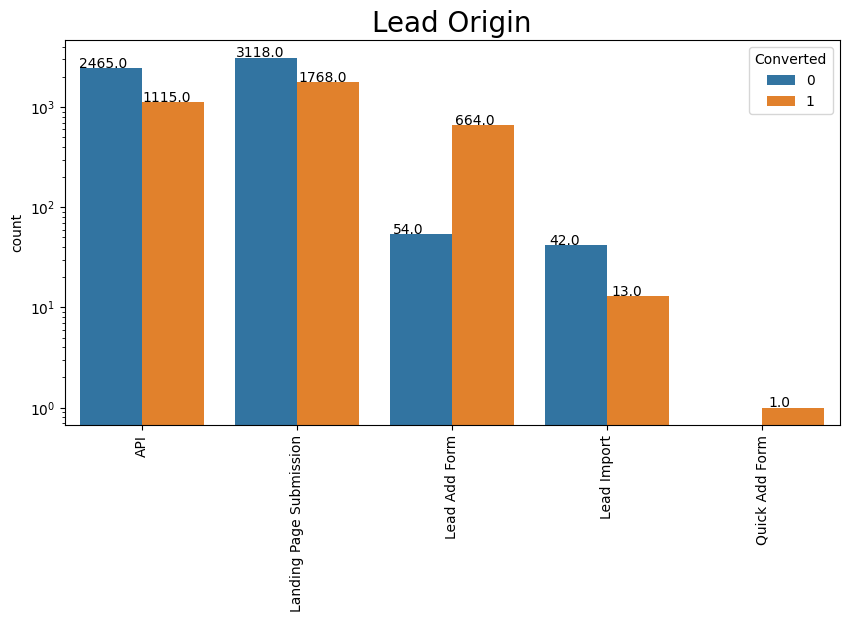

In [ ]:
leads_df_plot('Lead Origin', 10, 5)

'API' and 'Landing Page Submission' exhibit a conversion rate of 30-35%, and despite a substantial lead count originating from them, their conversion rates could be enhanced. On the other hand, 'Lead Add' Form boasts a conversion rate exceeding 90%, although the lead count is relatively lower. Lead Import, conversely, has a minimal lead count.

To enhance the overall lead conversion rate, the strategy will involve improving the conversion rates of leads from API and Landing Page Submission sources, alongside efforts to generate more leads through Lead Add Form.

3. 'Lead Source'

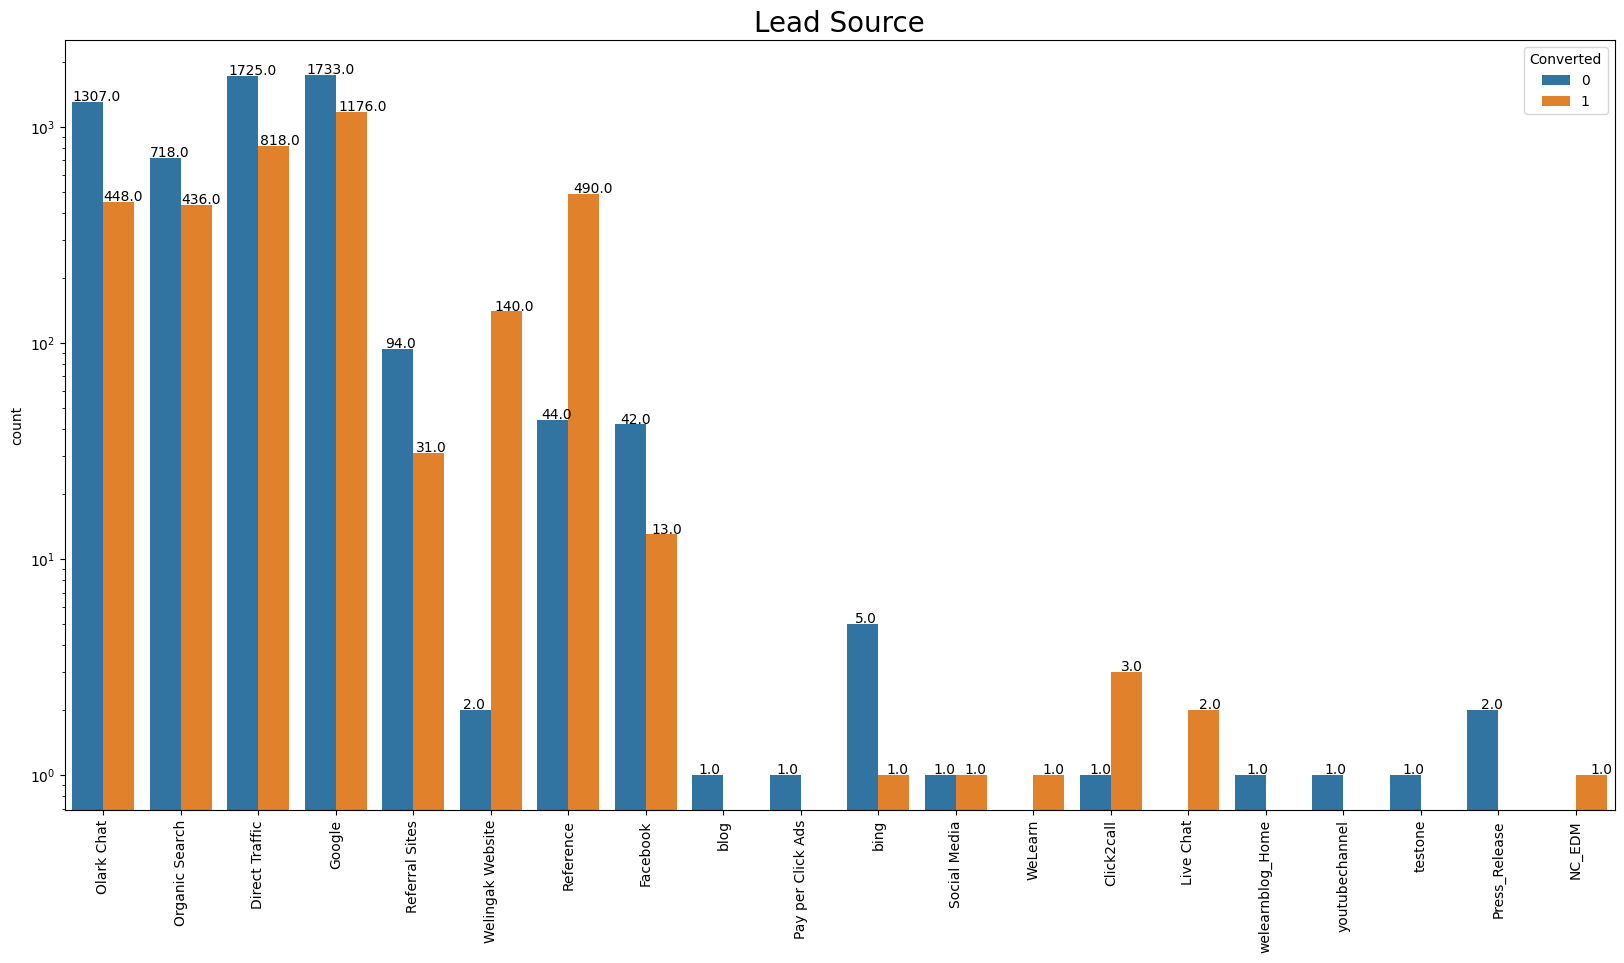

In [ ]:
leads_df_plot('Lead Source', 20, 10)

In [ ]:
# Introducing a new category labeled 'Others' for some of the Lead Sources that have relatively fewer occurrences
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

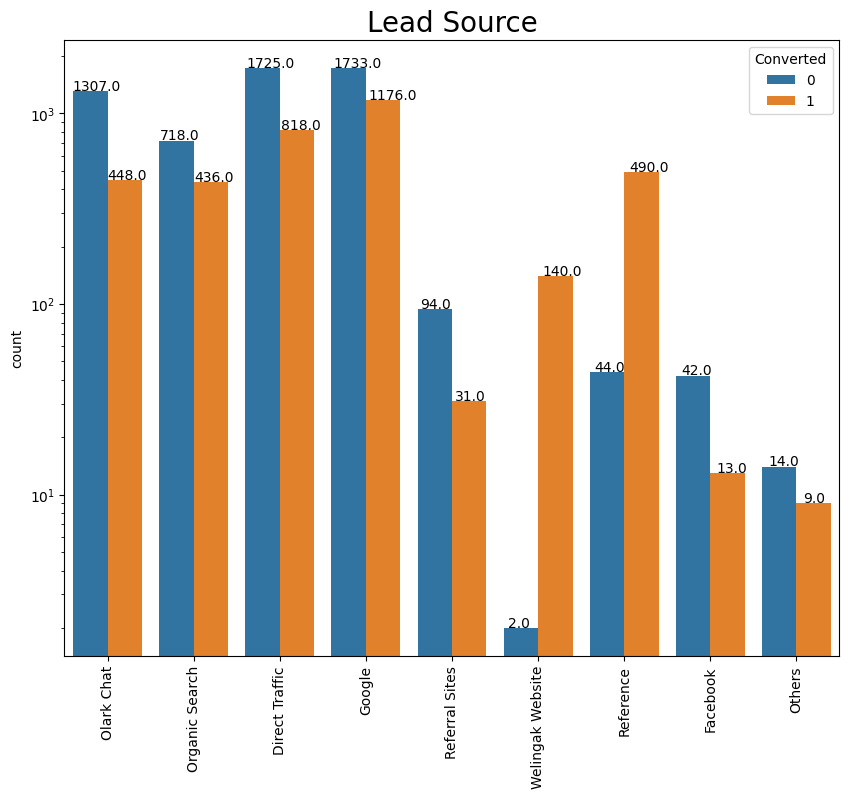

In [ ]:
# Visualizing countplot again
leads_df_plot('Lead Source', 10, 8)

1. Google and direct traffic generate the highest number of leads.
2. The conversion rate is notably high for reference leads and leads through the Welingak website.

To enhance the overall lead conversion rate, emphasis should be placed on improving the conversion of Olark chat, organic search, direct traffic, and Google leads. Additionally, efforts should be directed towards generating more leads from reference sources and the Welingak website.

4. 'Do Not Email' and 'Do Not Call'

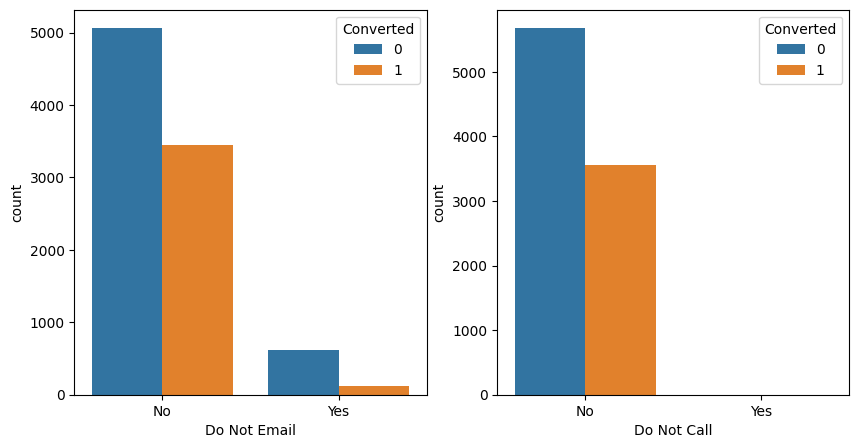

In [ ]:
# Visualizing countplots for 'Do Not Email' and 'Do Not Call' in regard to converted and not converted leads
fig, axs = plt.subplots(1,2,figsize = (10,5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1])
plt.show()

The majority of entries are 'No.' No meaningful inference can be derived from these parameters.

5. 'Total Visits'

In [ ]:
# Getting statistical data about 'Total visits' column
leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

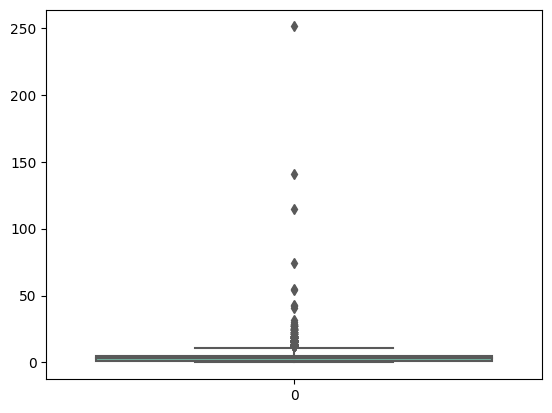

In [ ]:
# Generating boxplot for checking outliers
sns.boxplot(leads_df['TotalVisits'],orient='vert',palette='Set2')
plt.show()

Observing the presence of numerous outliers in the data, it is better to cap these outliers at the 95th percentile value for the purpose of analysis.

In [ ]:
# Capping value at 95%
percentiles = leads_df['TotalVisits'].quantile([0.05,0.95]).values
leads_df['TotalVisits'][leads_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_df['TotalVisits'][leads_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

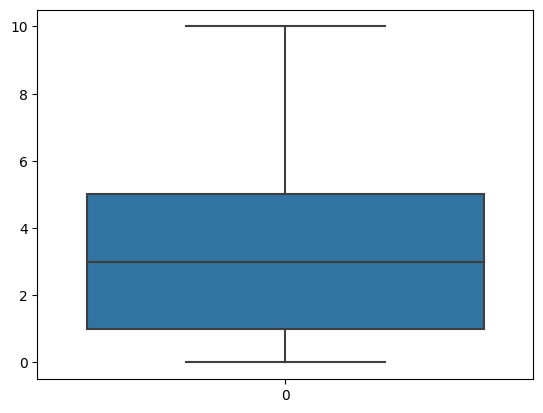

In [ ]:
# Regenerating boxplot for checking outliers
sns.boxplot(leads_df['TotalVisits'])
plt.show()

No outliers are present.

<Axes: xlabel='Converted', ylabel='TotalVisits'>

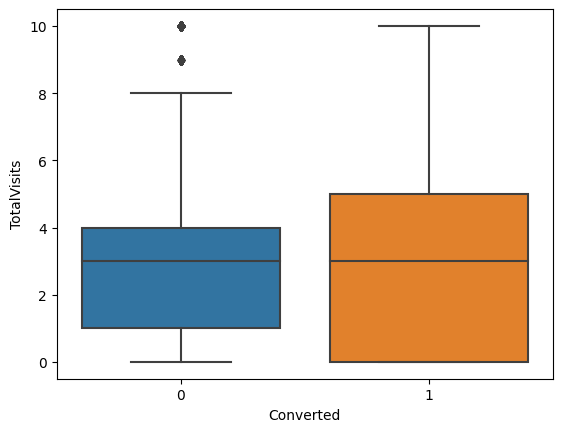

In [ ]:
# Generating boxplot in relation with converted and not converted leads
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)

Since the median values for both converted and non-converted leads are identical, it can be concluded that the 'Total Visits' variable holds no significance for further analysis.

6. 'Total time spent on website'


In [ ]:
# Getting statistical data about 'Total Time Spent on Website' column
leads_df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

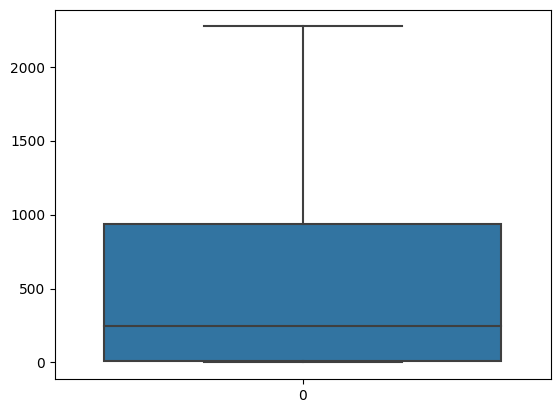

In [ ]:
# Generating boxplot for 'Total Time Spent on Website'column
sns.boxplot(leads_df['Total Time Spent on Website'])
plt.show()

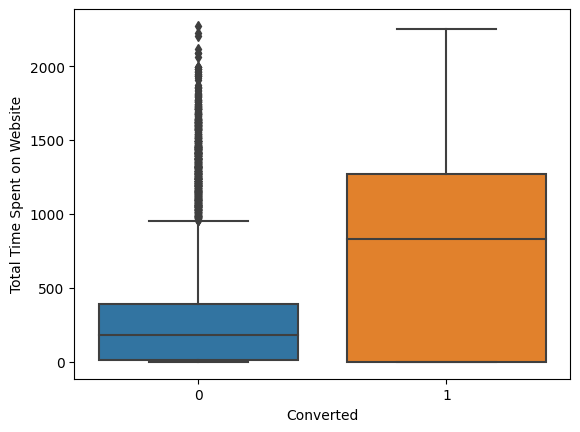

In [ ]:
# Generating boxplot for 'Total Time Spent on Website'column in relation with converted and not converted leads
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

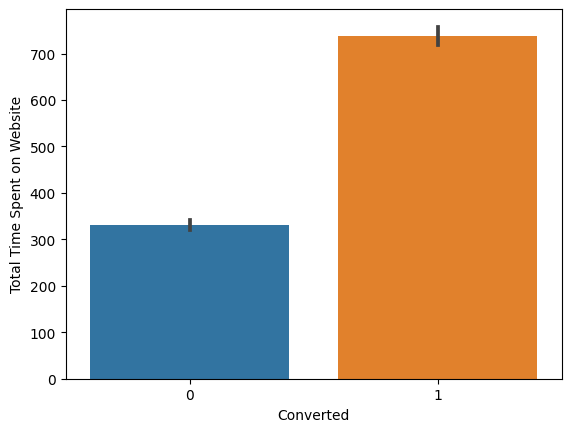

In [ ]:
# Generating barplot for 'Total Time Spent on Website'column in relation with converted and not converted leads
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

Leads that spend a longer duration on the website demonstrate a higher likelihood of conversion.

To enhance conversion rates, efforts should focus on making the website more engaging to encourage leads to spend more time.

7. 'Page views per visit'

In [ ]:
# Getting statistical data about 'Page Views Per Visit' column
leads_df['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

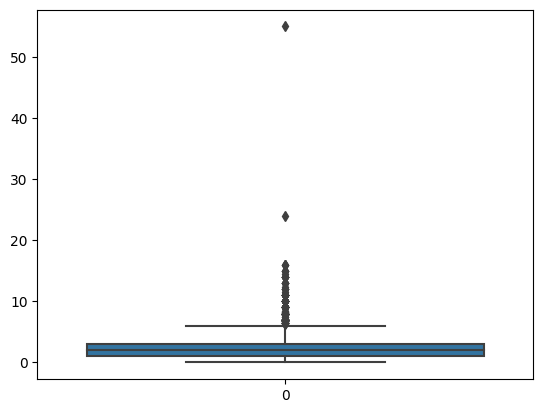

In [ ]:
# Generating boxplot for 'Page Views Per Visit' column to check outliers
sns.boxplot(leads_df['Page Views Per Visit'])
plt.show()


Observing the presence of numerous outliers in the data, We will limit the outliers to the 95th percentile value for analysis.

In [ ]:
# Capping value at 95%
percentiles = leads_df['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

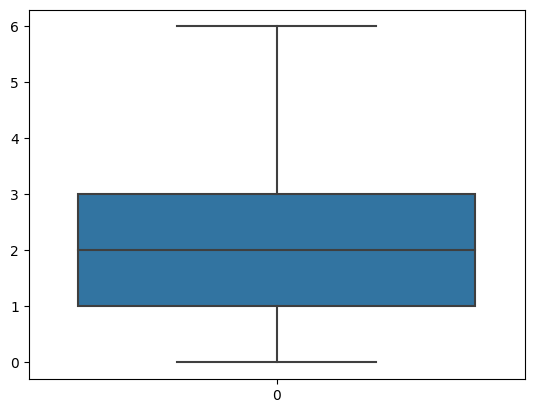

In [ ]:
# Regenerating boxplot after removing outliers
sns.boxplot(leads_df['Page Views Per Visit'])
plt.show()

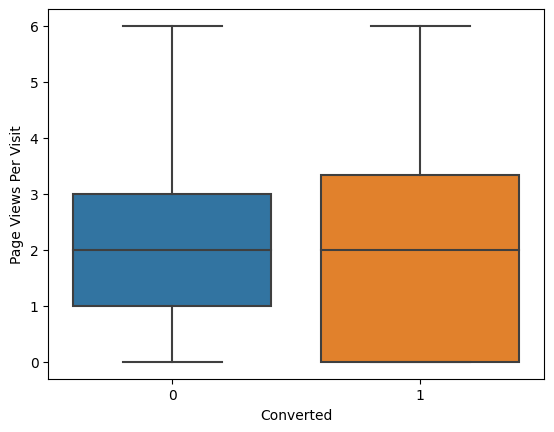

In [ ]:
# Generating barplot for 'Page Views Per Visit' column in relation with converted and not converted leads
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.show()

Since the median values for both converted and non-converted leads are identical, it can be concluded that the 'Page Views Per Visit' variable holds no significance for further analysis.

8. Last Activity

In [ ]:
# Getting statistical data about 'Last Activity' column
leads_df['Last Activity'].describe()

count             9240
unique              17
top       Email Opened
freq              3540
Name: Last Activity, dtype: object

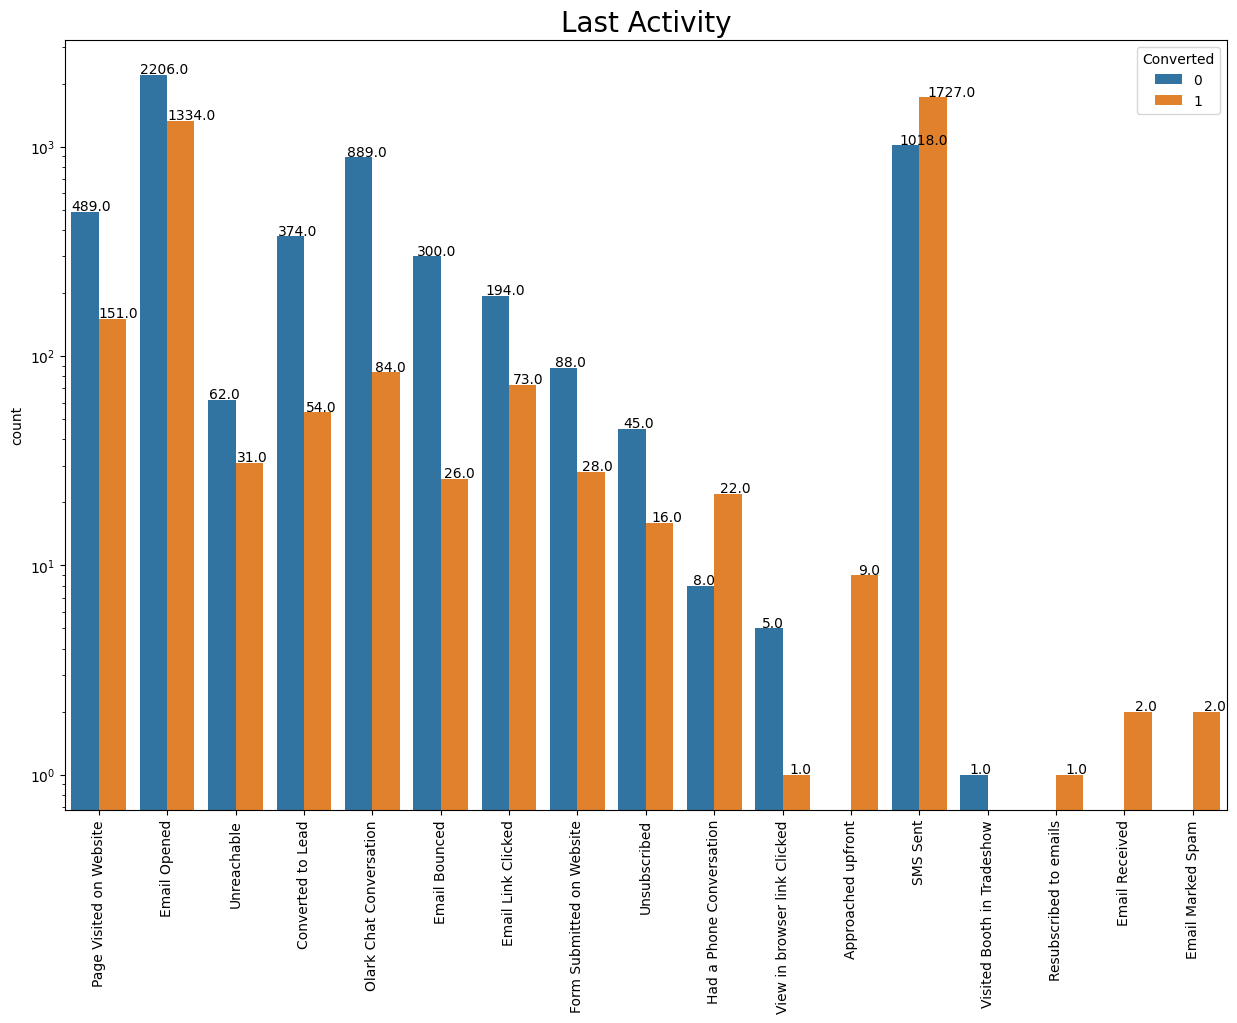

In [ ]:
# Generating countplot for 'Last Activity' column
leads_df_plot('Last Activity', 15, 10)

In [ ]:
# Renaming some low output values to "Other_Activity"
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

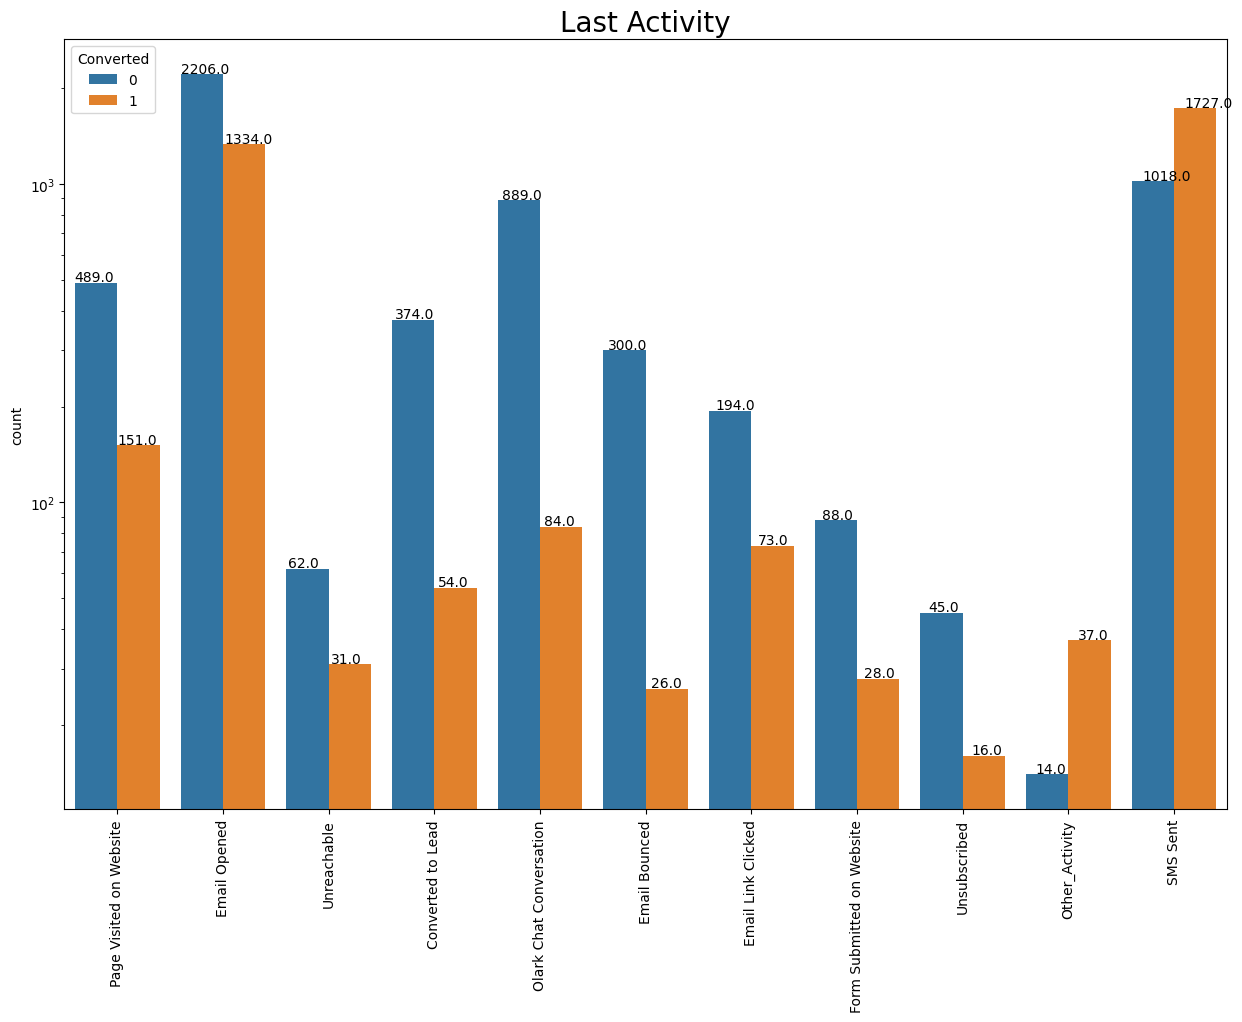

In [ ]:
# Regenerating countplot for 'Last Activity' column
leads_df_plot('Last Activity', 15, 10)

A significant majority of leads have 'Email Opened' as their last activity. The conversion rate for leads with the last activity recorded as 'SMS Sent' is nearly 60%.

9. Country

In [ ]:
# Getting statistical data about 'country' column
leads_df.Country.describe()

count      9240
unique       38
top       India
freq       8953
Name: Country, dtype: object

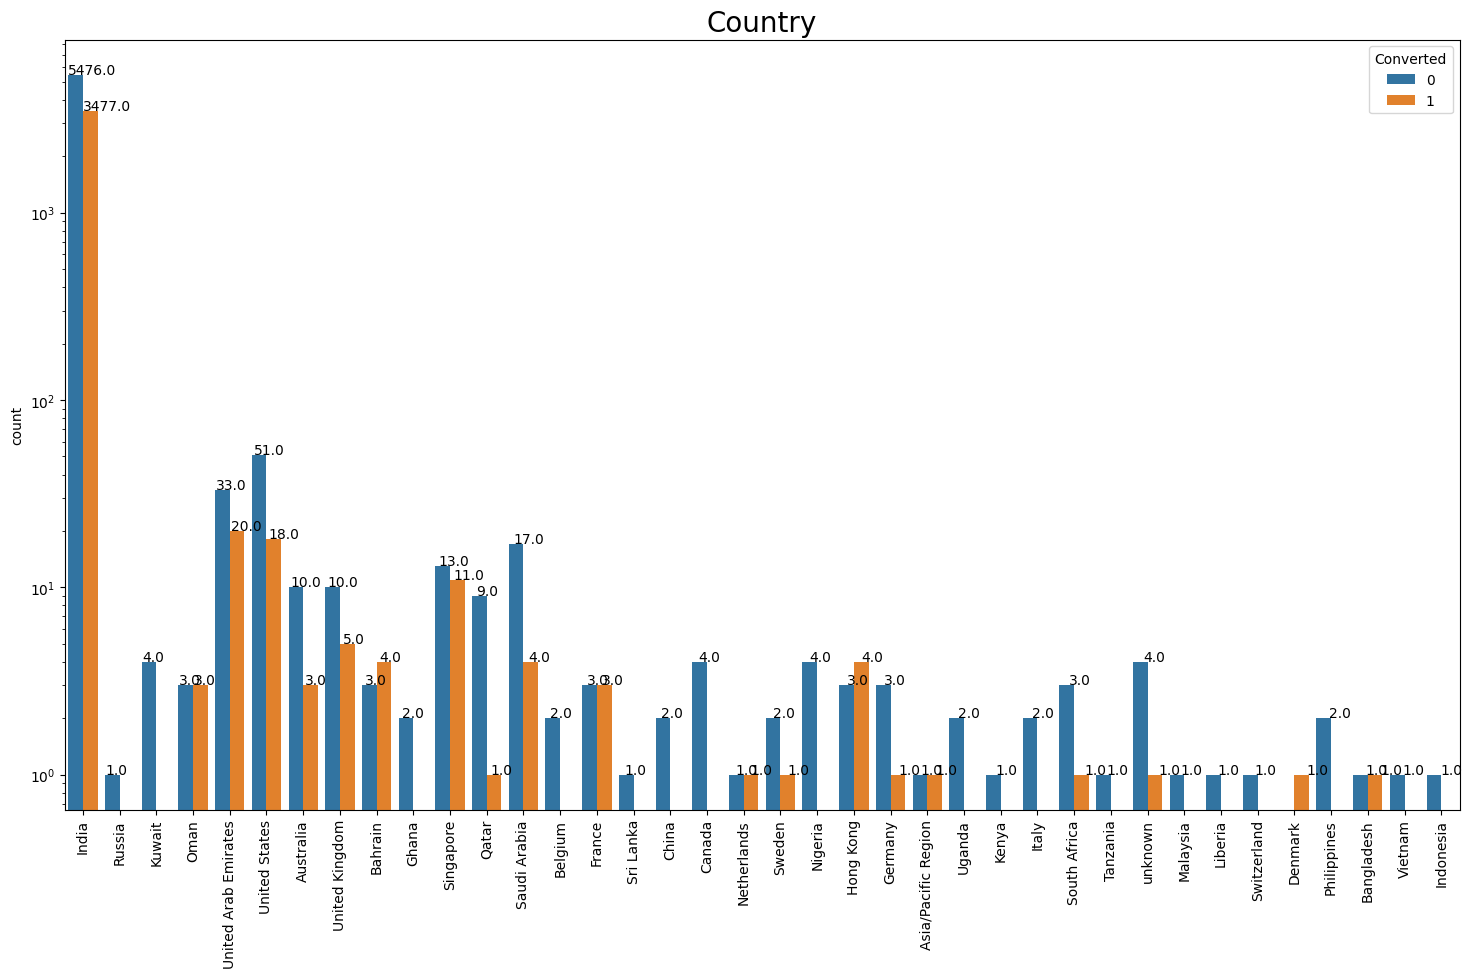

In [ ]:
# Generating countplot for 'Country'
leads_df_plot('Country', 18,10)

Given that the majority of values are 'India,' no meaningful inference can be derived.

10. Specialization

In [ ]:
# Getting statistical data about 'Specialization' column
leads_df.Specialization.describe()

count      9240
unique       19
top       Other
freq       3380
Name: Specialization, dtype: object

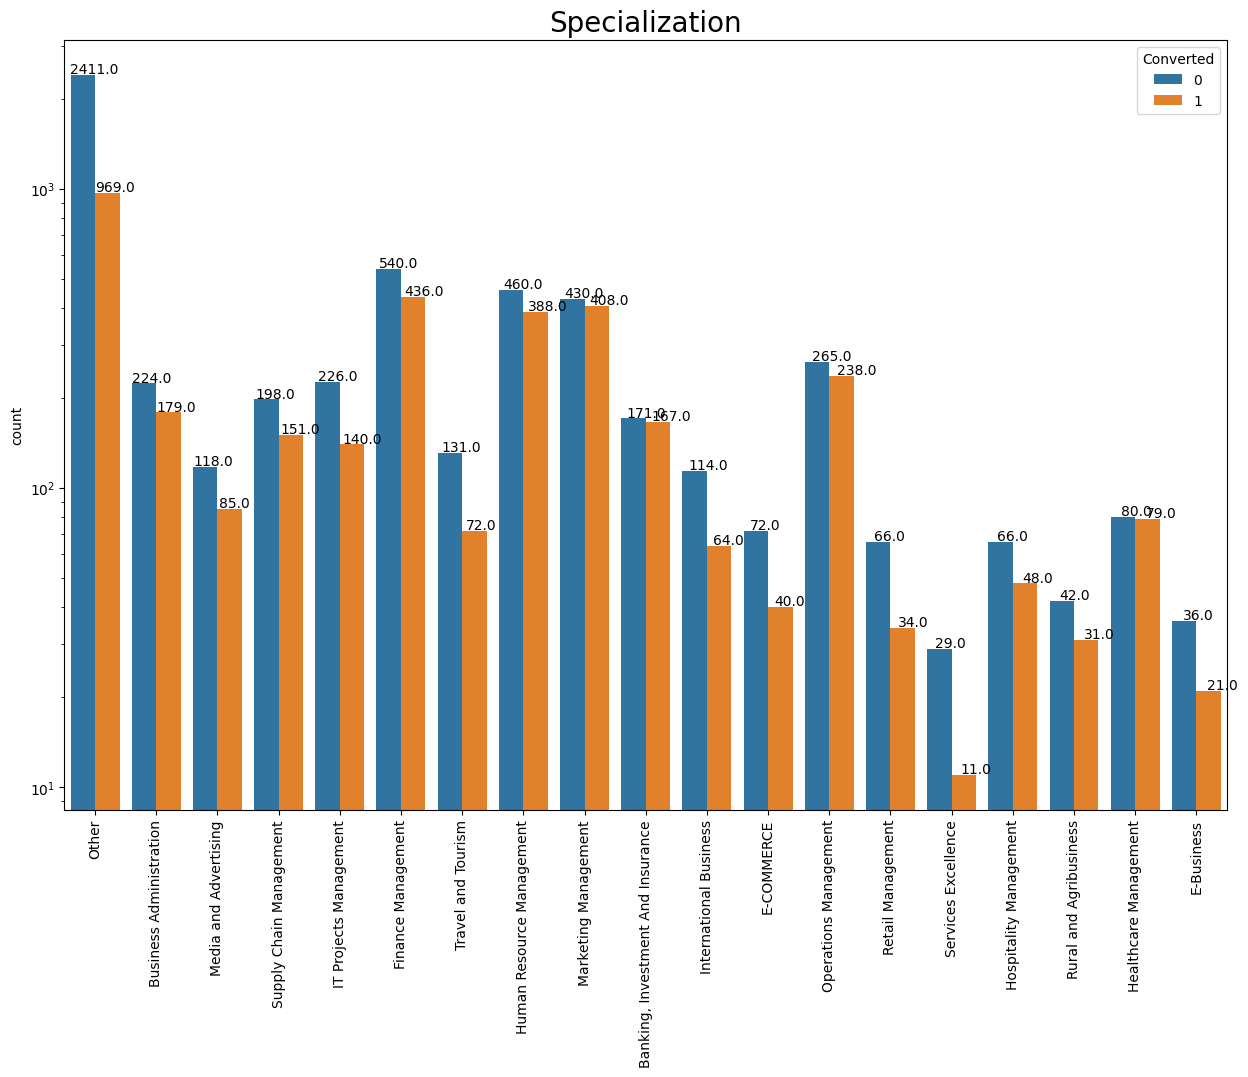

In [ ]:
# Generating countplot for 'Specialization'
leads_df_plot('Specialization', 15,10)

The emphasis should be placed on specializations with high conversion rates. Management-related professions, including 'Finance Management,' 'Human Resource Management,' 'Marketing Management,' and 'Operations Management,' warrant particular attention in this regard.

11. Occupation

In [ ]:
# Getting statistical data about 'What is your current occupation' column
leads_df['What is your current occupation'].describe()

count           9240
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

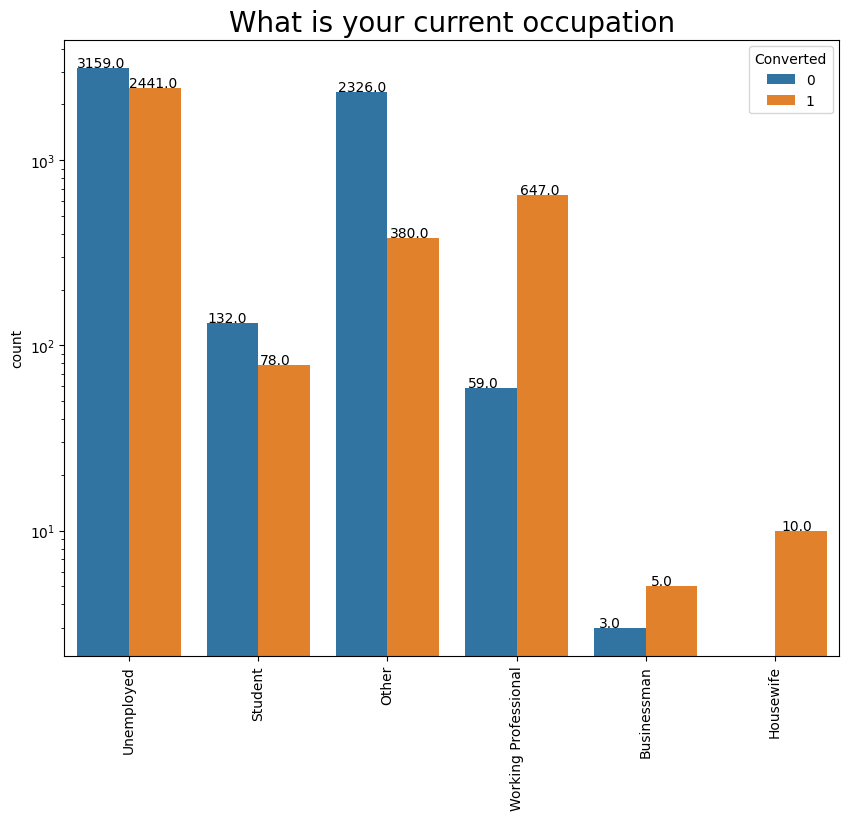

In [ ]:
# Generating countplot for ‘What is your current occupation’
leads_df_plot('What is your current occupation', 10,8)

Individuals who are working professionals and opt for the course exhibit a high likelihood of joining. Although unemployed leads constitute the majority in terms of numbers, they have a conversion rate of approximately 40%.

12. Search

In [ ]:
# Getting statistical data about 'Search' column
leads_df.Search.describe()

count     9240
unique       2
top         No
freq      9226
Name: Search, dtype: object

The majority of entries are marked as 'No.' No meaningful inference can be derived from this parameter.

13. Magazine


In [ ]:
# Getting statistical data about 'Magazine' column
leads_df.Magazine.describe()

count     9240
unique       1
top         No
freq      9240
Name: Magazine, dtype: object

The majority of entries are marked as 'No.' No meaningful inference can be derived from this parameter.

14. Newspaper Article


In [ ]:
# Getting statistical data about 'Newspaper Article' column
leads_df['Newspaper Article'].describe()

count     9240
unique       2
top         No
freq      9238
Name: Newspaper Article, dtype: object

The majority of entries are marked as 'No.' No meaningful inference can be derived from this parameter.

15. X Education Forums

In [ ]:
# Getting statistical data about 'X Education Forums' column
leads_df['X Education Forums'].describe()

count     9240
unique       2
top         No
freq      9239
Name: X Education Forums, dtype: object

The majority of entries are marked as 'No.' No meaningful inference can be derived from this parameter.

16. Newspaper

In [ ]:
# Getting statistical data about 'Newspaper' column
leads_df['Newspaper'].describe()

count     9240
unique       2
top         No
freq      9239
Name: Newspaper, dtype: object

The majority of entries are marked as 'No.' No meaningful inference can be derived from this parameter.

17. Digital Advertisement

In [ ]:
# Getting statistical data about 'Digital Advertisement' column
leads_df['Digital Advertisement'].describe()

count     9240
unique       2
top         No
freq      9236
Name: Digital Advertisement, dtype: object

The majority of entries are marked as 'No.' No meaningful inference can be derived from this parameter.

18. Through Recommendations¶


In [ ]:
# Getting statistical data about 'Through Recommendations' column
leads_df['Through Recommendations'].describe()

count     9240
unique       2
top         No
freq      9233
Name: Through Recommendations, dtype: object

The majority of entries are marked as 'No.' No meaningful inference can be derived from this parameter.

19. Receive More Updates About Our Courses

In [ ]:
# Getting statistical data about 'Receive More Updates About Our Courses' column
leads_df['Receive More Updates About Our Courses'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Receive More Updates About Our Courses, dtype: object

The majority of entries are marked as 'No.' No meaningful inference can be derived from this parameter.

20. Tags


In [ ]:
# Getting statistical data about 'Tags' column
leads_df.Tags.describe()

count                                    9240
unique                                     26
top       Will revert after reading the email
freq                                     5425
Name: Tags, dtype: object

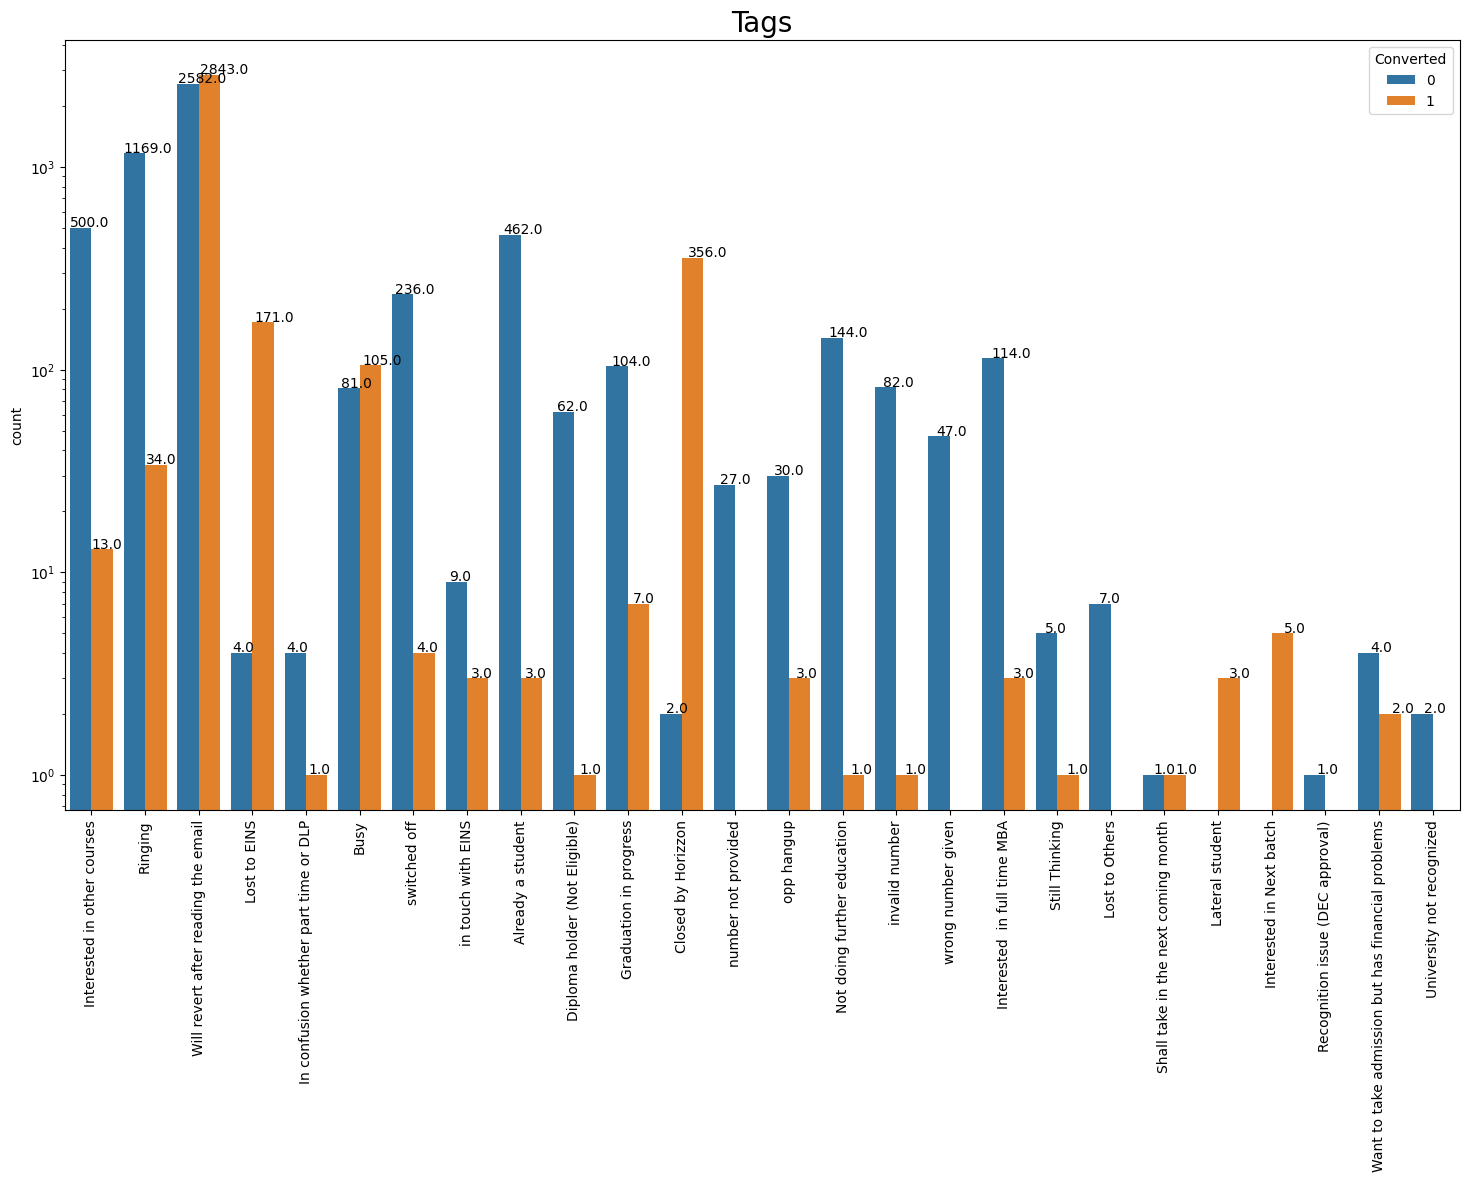

In [ ]:
# Generating countplot for ‘Tags’
leads_df_plot('Tags', 18, 10)

In [ ]:
# Merging some values to "Other_Tags" for better understanding
leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

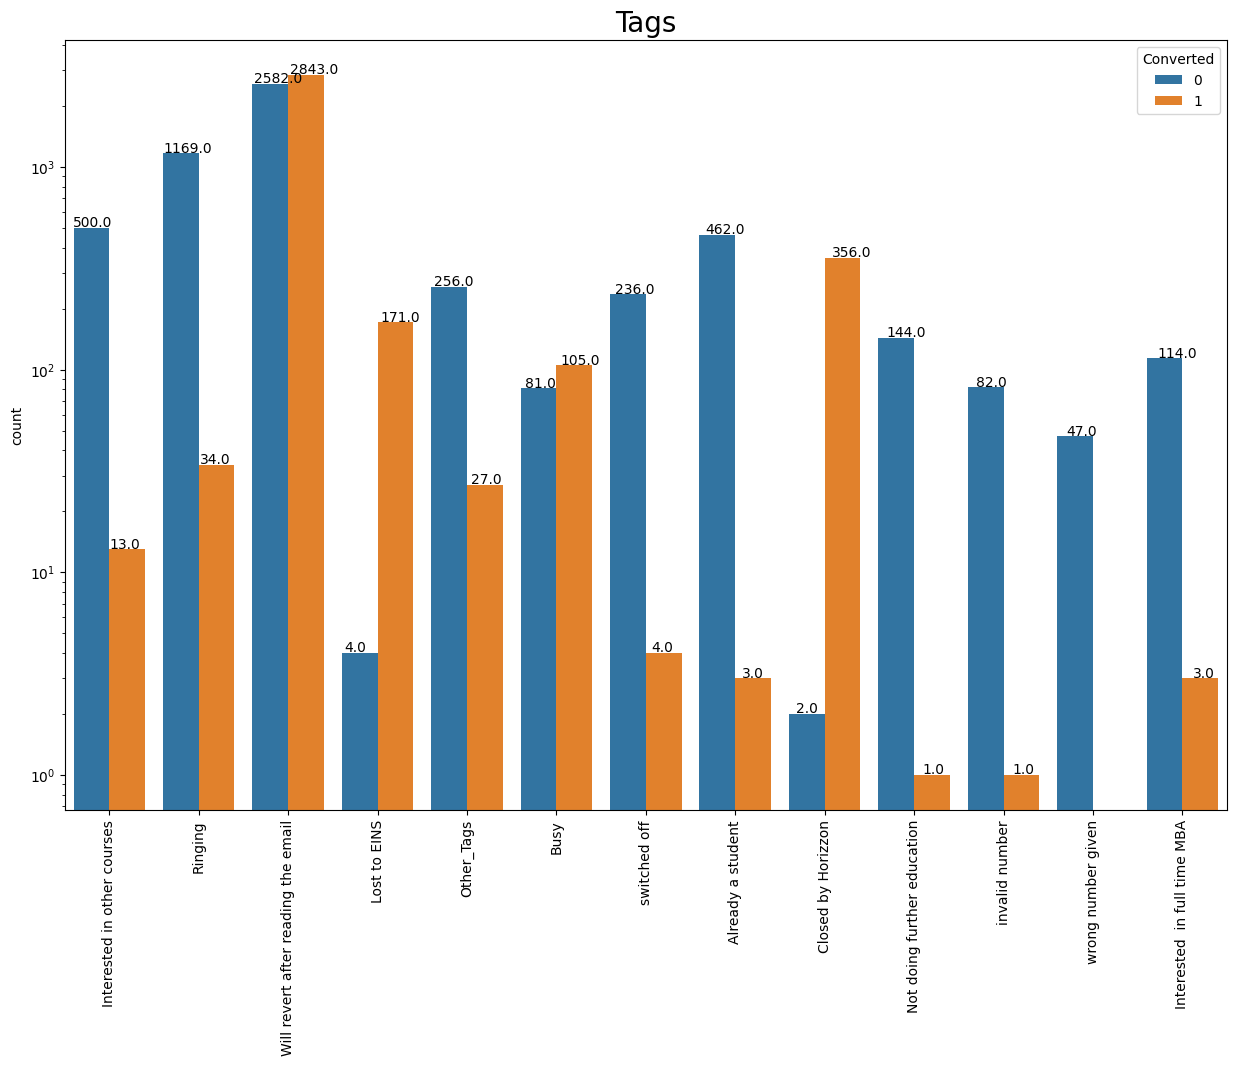

In [ ]:
# Regenerating countplot for ‘Tags’
leads_df_plot('Tags', 15, 10)

As this column is generated by the sales team for their analysis and is not available for model building, it is necessary to exclude this column before constructing the model.

21. Update me on Supply Chain Content


In [ ]:
# Getting statistical data about 'Update me on Supply Chain Content' column
leads_df['Update me on Supply Chain Content'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Update me on Supply Chain Content, dtype: object

The majority of entries are marked as 'No.' No meaningful inference can be derived from this parameter.

22. Get updates on DM Content

In [ ]:
# Getting statistical data about 'Get updates on DM Content' column
leads_df['Get updates on DM Content'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Get updates on DM Content, dtype: object

The majority of entries are marked as 'No.' No meaningful inference can be derived from this parameter.

23. I agree to pay the amount through cheque

In [ ]:
# Getting statistical data about 'I agree to pay the amount through cheque' column
leads_df['I agree to pay the amount through cheque'].describe()

count     9240
unique       1
top         No
freq      9240
Name: I agree to pay the amount through cheque, dtype: object

The majority of entries are marked as 'No.' No meaningful inference can be derived from this parameter.

24. A free copy of Mastering The Interview

In [ ]:
# Getting statistical data about 'A free copy of Mastering The Interview' column
leads_df['A free copy of Mastering The Interview'].describe()

count     9240
unique       2
top         No
freq      6352
Name: A free copy of Mastering The Interview, dtype: object

The majority of entries are marked as 'No.' No meaningful inference can be derived from this parameter.

25. City


In [ ]:
# Getting statistical data about 'City' column
leads_df.City.describe()

count       9240
unique         6
top       Mumbai
freq        6891
Name: City, dtype: object

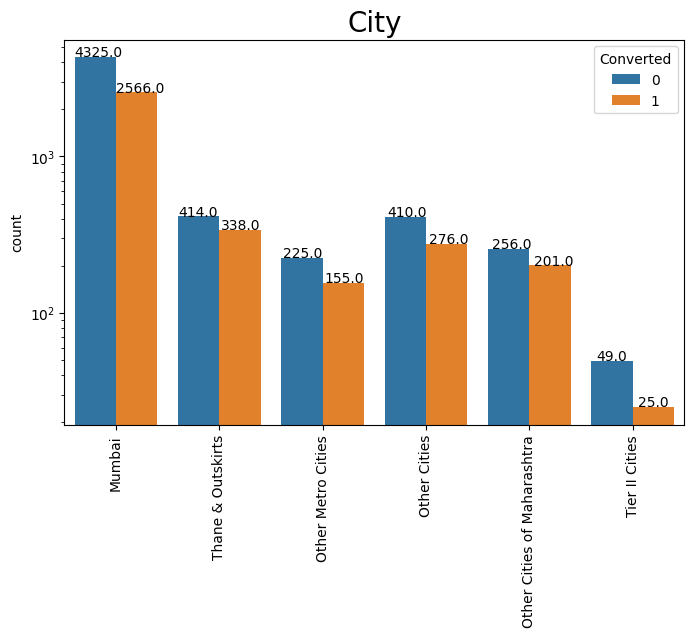

In [ ]:
# Generating countplot for ‘City’
leads_df_plot('City', 8, 5)

The majority of leads originate from Mumbai, and they exhibit an approximate 30% conversion rate.

26. Last Notable Activity

In [ ]:
# Getting statistical data about 'Last Notable Activity' column
leads_df['Last Notable Activity'].describe()

count         9240
unique          16
top       Modified
freq          3407
Name: Last Notable Activity, dtype: object

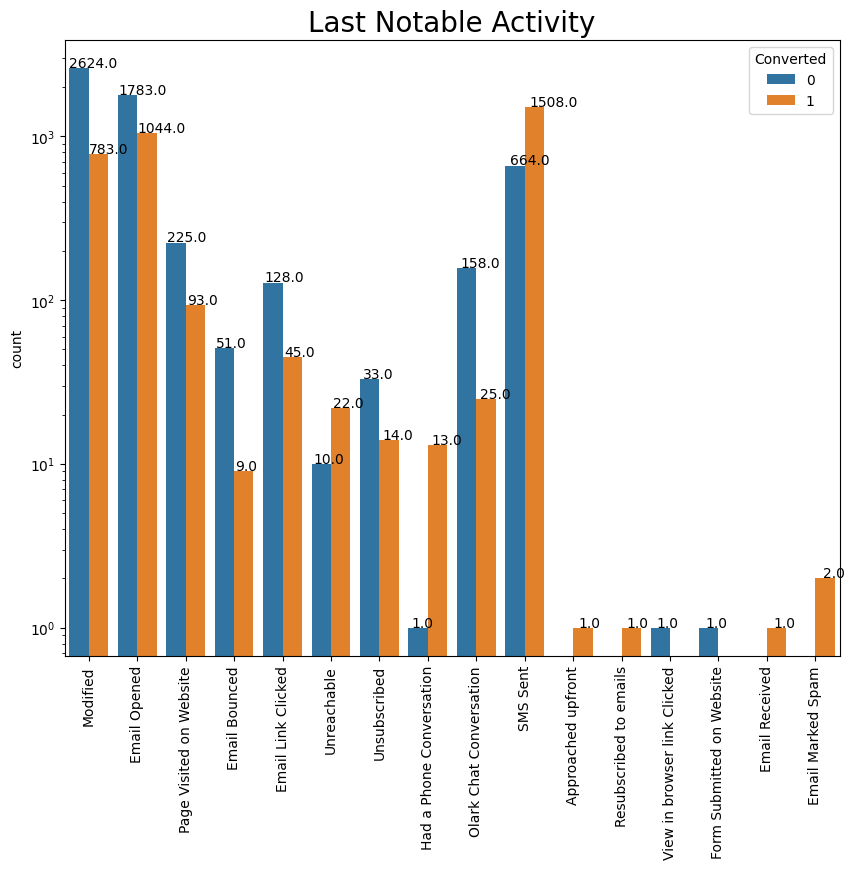

In [ ]:
leads_df_plot('Last Notable Activity',10,8)

Following the univariate analysis, several columns are identified as not contributing meaningful information to the method. Therefore, it is advisable to eliminate these columns. The columns that are not required are 'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call', and 'Do Not Email'

In [ ]:
# Dropping columns that are not required
leads_df = leads_df.drop(['Search','Magazine','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement',
                          'Through Recommendations','Receive More Updates About Our Courses',
                          'Update me on Supply Chain Content','Get updates on DM Content',
                          'I agree to pay the amount through cheque','A free copy of Mastering The Interview',
                          'Country','Do Not Call','Do Not Email'],1)

In [ ]:
# Checking the shape of the dataset
leads_df.shape

(9240, 12)

There are 12 columns available after univariate analysis.

In [ ]:
leads_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Interested in other courses,Mumbai,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,Unemployed,Ringing,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Will revert after reading the email,Mumbai,Modified


---

#### Bivariate Analysis

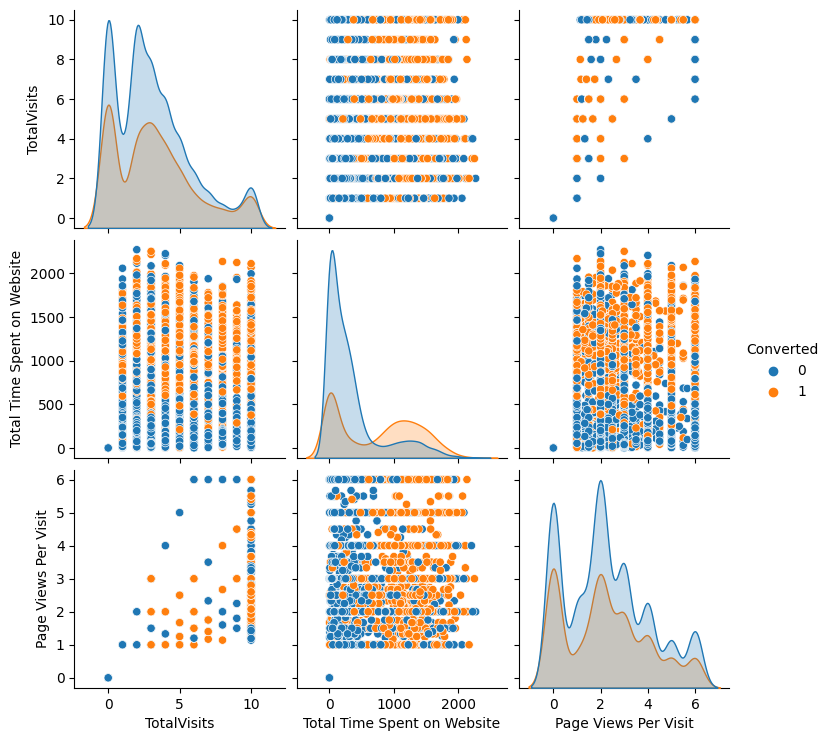

In [ ]:
# Checking the relation between 'TotalVisits,' 'Page Views Per Visit,' and 'Total Time Spent on Website', and leads 'Converted'
leads_num = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(leads_num,diag_kind='kde',hue='Converted')
plt.show()

The pairplot shows relation between 'TotalVisits,' 'Page Views Per Visit,' and 'Total Time Spent on Website', and leads 'Converted'. Where '1' is 'converted' and '0' is 'not converted'.

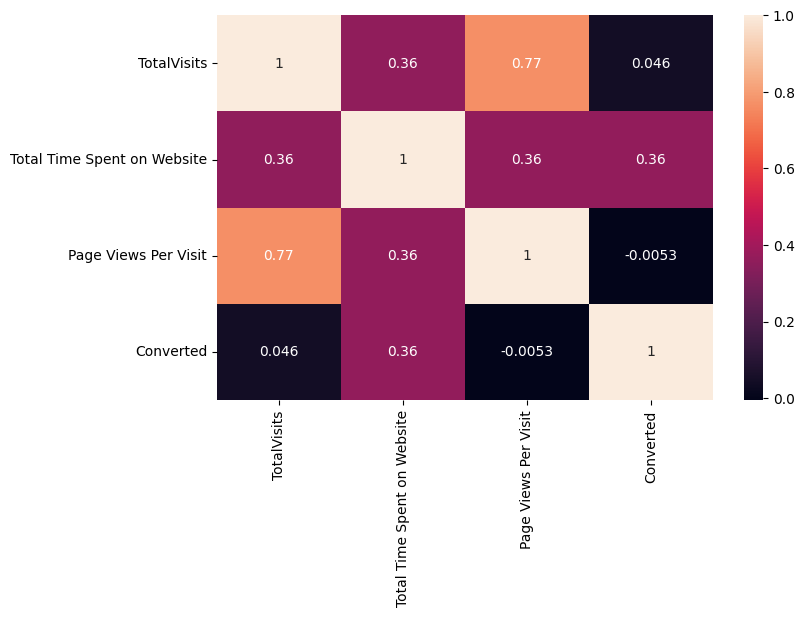

In [ ]:
# Using Heatmap to understand the attributes correlation better
plt.figure(figsize = (8,5))
ax = sns.heatmap(leads_num.corr(),annot = True)

'TotalVisits' and 'Page Views per Visit' exhibit a high correlation of 0.77.
'Total Time Spent on Website' demonstrates a correlation of 0.36 with the target variable 'Converted'.

### Data Preparation

#### Creating Dummy variables for the categorical features:
Creating dummy for 'Lead Origin', 'Lead Source', 'Last Activity','Tags','Specialization','What is your current occupation','City','Last Notable Activity'

In [ ]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_leads = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Tags', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_leads.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Concatenating 'dummy_leads' to 'leads_df' dataframe
leads_df = pd.concat([leads_df, dummy_leads], axis=1)
leads_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Interested in other courses,Mumbai,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,Unemployed,Ringing,Mumbai,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Will revert after reading the email,Mumbai,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,

Dropping the columns for which dummies were created.

In [ ]:
leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Tags', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [ ]:
leads_df.shape

(9240, 81)

Now, the dataset has 81 columns after the creation of dummy variables and dropping columns for which dummy variables were created.

#### Splitting the data into  train and test set.

In [ ]:
# Adding feature variable to X
X = leads_df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Adding target variable to y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# size of X_train dataframe
X_train.shape

(6468, 80)

In [ ]:
# size of X_train dataframe
X_test.shape

(2772, 80)

#### Feature Scaling

In [ ]:
# Scaling the features for standardizing features
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.662077,-0.691418,0.143543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.662077,1.365219,1.553761,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Checking the Lead Conversion rate
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

38.53896103896104

We have about 38% lead conversion rate.

#### Feature Selection Using RFE

In [ ]:
#from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)             # running RFE with 20 variables as output

rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False])

In [ ]:
# Creating list
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 27),
 ('Lead Origin_Quick Add Form', False, 54),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', False, 19),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 23),
 ('Lead Source_Reference', False, 18),
 ('Lead Source_Referral Sites', False, 39),
 ('Lead Source_Welingak Website', False, 3),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', False, 12),
 ('Last Activity_Form Submitted on Website', False, 42),
 ('Last Activity_Olark Chat Conversation', False, 20),
 ('Last Activity_Other_Activity', False, 10),
 ('Last Activity_Page Visited on Website', False, 47),
 ('Last Activity_SMS Sent', True, 1),
 ('L

In [ ]:
# Viewing columns selected by RFE
cols_rfe = X_train.columns[rfe.support_]
cols_rfe

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Model Building

Assessing the models with StatsModels:

##### Model-1

In [ ]:
# Creating and running the model
X_train_sm1 = sm.add_constant(X_train[cols_rfe])
logm1 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1222.7
Date:                Mon, 18 Dec 2023   Deviance:                       2445.5
Time:                        13:17:38   Pearson chi2:                 1.77e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6138
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1263      0.196    -15.942      0.000      -3.511      -2.742
Total Time Spent on Website                              0.9237      0.054     16.959      0.000       0.817       1.030
Lead Origin_Lead Add Form                                1.6169      0.274      5.905      0.000       1.080       2.154
Lead Source_Facebook                                    -1.1622      0.622     -1.869      0.062      -2.381       0.056
Last Activity_Email Bounced                             -1.8302      0.363     -5.039      0.000      -2.542      -1.118
Last Activity_SMS Sent                                   2.0219      0.126     16.065      0.000       1.775       2.269
Tags_Busy                                                2.0466      0.291      7.038      0.000       1.477       2.616
Tags_Closed by Horizzon                                  8.7269      1.031      8.462      0.000       6.706      10.748
Tags_Lost to EINS                                       10.5347      0.800     13.162      0.000       8.966      12.103
Tags_Not doing further education                        -1.1045      1.037     -1.065      0.287      -3.137       0.928
Tags_Ringing                                            -1.8028      0.293     -6.144      0.000      -2.378      -1.228
Tags_Will revert after reading the email                 4.8624      0.212     22.939      0.000       4.447       5.278
Tags_invalid number                                     -2.3304      1.126     -2.069      0.039      -4.538      -0.123
Tags_switched off                                       -1.9430      0.556     -3.495      0.000      -3.033      -0.853
Tags_wrong number given                                -21.4595   1.24e+04     -0.002      0.999   -2.43e+04    2.43e+04
What is your current occupation_Other                   -3.7805      0.136    -27.713      0.000      -4.048      -3.513
What is your current occupation_Working Professional     1.1936      0.293      4.073      0.000       0.619       1.768
Last Notable Activity_Email Link Clicked                -1.0206      0.429     -2.377      0.017      -1.862      -0.179
Last Notable Activity_Had a Phone Conversation           3.0951      1.387      2.232      0.026       0.377       5.813
Last Notable Activity_Modified                          -1.4822      0.122    -12.198      0.000      -1.720      -1.244
Last Notable Activity_Olark Chat Conversation           -1.6445      0.478     -3.441      0.001      -2.581      -0.708
========================================================================================================================
"""

Given the high p-value of 'Tags_wrong number given', it is advisable to remove this column.

In [ ]:
# Dropping the column 'Tags_wrong number given'
col1 = cols_rfe.drop('Tags_wrong number given', 1)

##### Model 2

In [ ]:
# Creating and running the model
X_train_sm2 = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1226.5
Date:                Mon, 18 Dec 2023   Deviance:                       2453.0
Time:                        13:17:42   Pearson chi2:                 1.74e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6133
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2316      0.196    -16.491      0.000      -3.616      -2.847
Total Time Spent on Website                              0.9235      0.054     16.978      0.000       0.817       1.030
Lead Origin_Lead Add Form                                1.6265      0.274      5.925      0.000       1.088       2.164
Lead Source_Facebook                                    -1.1593      0.622     -1.864      0.062      -2.378       0.059
Last Activity_Email Bounced                             -1.8350      0.364     -5.047      0.000      -2.548      -1.122
Last Activity_SMS Sent                                   1.9999      0.125     16.001      0.000       1.755       2.245
Tags_Busy                                                2.1634      0.289      7.482      0.000       1.597       2.730
Tags_Closed by Horizzon                                  8.8195      1.031      8.551      0.000       6.798      10.841
Tags_Lost to EINS                                       10.6233      0.801     13.271      0.000       9.054      12.192
Tags_Not doing further education                        -0.9969      1.037     -0.961      0.336      -3.029       1.035
Tags_Ringing                                            -1.6806      0.291     -5.770      0.000      -2.251      -1.110
Tags_Will revert after reading the email                 4.9645      0.212     23.412      0.000       4.549       5.380
Tags_invalid number                                     -2.2062      1.125     -1.961      0.050      -4.411      -0.001
Tags_switched off                                       -1.8199      0.555     -3.281      0.001      -2.907      -0.733
What is your current occupation_Other                   -3.7705      0.136    -27.733      0.000      -4.037      -3.504
What is your current occupation_Working Professional     1.2079      0.295      4.096      0.000       0.630       1.786
Last Notable Activity_Email Link Clicked                -1.0197      0.430     -2.373      0.018      -1.862      -0.178
Last Notable Activity_Had a Phone Conversation           3.1408      1.399      2.245      0.025       0.398       5.883
Last Notable Activity_Modified                          -1.4713      0.121    -12.115      0.000      -1.709      -1.233
Last Notable Activity_Olark Chat Conversation           -1.6414      0.478     -3.434      0.001      -2.578      -0.705
========================================================================================================================
"""

Due to the high p-value of 'Tags_Not doing further education', it is recommended to eliminate this column.

In [ ]:
# Dropping the column 'Tags_Not doing further education'
col2 = col1.drop('Tags_Not doing further education',1)

##### Model 3

In [ ]:
# Creating and running the model
X_train_sm3 = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1227.1
Date:                Mon, 18 Dec 2023   Deviance:                       2454.2
Time:                        13:17:47   Pearson chi2:                 1.74e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6132
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2827      0.192    -17.074      0.000      -3.659      -2.906
Total Time Spent on Website                              0.9238      0.054     16.983      0.000       0.817       1.030
Lead Origin_Lead Add Form                                1.6308      0.275      5.932      0.000       1.092       2.170
Lead Source_Facebook                                    -1.1594      0.622     -1.864      0.062      -2.378       0.059
Last Activity_Email Bounced                             -1.8415      0.363     -5.077      0.000      -2.552      -1.131
Last Activity_SMS Sent                                   2.0025      0.125     16.022      0.000       1.758       2.247
Tags_Busy                                                2.2129      0.287      7.715      0.000       1.651       2.775
Tags_Closed by Horizzon                                  8.8692      1.031      8.604      0.000       6.849      10.890
Tags_Lost to EINS                                       10.6757      0.800     13.350      0.000       9.108      12.243
Tags_Ringing                                            -1.6321      0.289     -5.647      0.000      -2.199      -1.066
Tags_Will revert after reading the email                 5.0148      0.209     24.016      0.000       4.606       5.424
Tags_invalid number                                     -2.1576      1.125     -1.919      0.055      -4.362       0.047
Tags_switched off                                       -1.7711      0.553     -3.200      0.001      -2.856      -0.686
What is your current occupation_Other                   -3.7709      0.136    -27.727      0.000      -4.037      -3.504
What is your current occupation_Working Professional     1.2150      0.296      4.106      0.000       0.635       1.795
Last Notable Activity_Email Link Clicked                -1.0188      0.430     -2.369      0.018      -1.862      -0.176
Last Notable Activity_Had a Phone Conversation           3.1651      1.405      2.252      0.024       0.411       5.919
Last Notable Activity_Modified                          -1.4719      0.121    -12.121      0.000      -1.710      -1.234
Last Notable Activity_Olark Chat Conversation           -1.6395      0.478     -3.428      0.001      -2.577      -0.702
========================================================================================================================
"""

Considering the significantly high p-value of 'Lead Source_Facebook,' it is advisable to exclude this column.

In [ ]:
# Dropping the column 'Lead Source_Facebook'
col3 = col2.drop('Lead Source_Facebook',1)

##### Model 4

In [ ]:
# Creating and running the model
X_train_sm4 = sm.add_constant(X_train[col3])
logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1228.8
Date:                Mon, 18 Dec 2023   Deviance:                       2457.7
Time:                        13:17:50   Pearson chi2:                 1.73e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6130
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2823      0.192    -17.077      0.000      -3.659      -2.906
Total Time Spent on Website                              0.9256      0.054     17.027      0.000       0.819       1.032
Lead Origin_Lead Add Form                                1.6457      0.274      5.997      0.000       1.108       2.183
Last Activity_Email Bounced                             -1.8300      0.363     -5.046      0.000      -2.541      -1.119
Last Activity_SMS Sent                                   1.9975      0.125     16.003      0.000       1.753       2.242
Tags_Busy                                                2.2022      0.287      7.678      0.000       1.640       2.764
Tags_Closed by Horizzon                                  8.8662      1.031      8.601      0.000       6.846      10.887
Tags_Lost to EINS                                       10.6629      0.799     13.338      0.000       9.096      12.230
Tags_Ringing                                            -1.6314      0.289     -5.646      0.000      -2.198      -1.065
Tags_Will revert after reading the email                 4.9985      0.208     23.982      0.000       4.590       5.407
Tags_invalid number                                     -2.1555      1.125     -1.916      0.055      -4.360       0.049
Tags_switched off                                       -1.7687      0.553     -3.196      0.001      -2.853      -0.684
What is your current occupation_Other                   -3.7570      0.135    -27.730      0.000      -4.023      -3.491
What is your current occupation_Working Professional     1.2141      0.296      4.106      0.000       0.635       1.794
Last Notable Activity_Email Link Clicked                -1.0081      0.429     -2.347      0.019      -1.850      -0.166
Last Notable Activity_Had a Phone Conversation           3.1683      1.404      2.256      0.024       0.416       5.920
Last Notable Activity_Modified                          -1.4746      0.121    -12.148      0.000      -1.713      -1.237
Last Notable Activity_Olark Chat Conversation           -1.6281      0.478     -3.409      0.001      -2.564      -0.692
========================================================================================================================
"""

Considering the significantly high p-value of 'Tags_invalid number', it is better to drop this column.

In [ ]:
# Dropping the column 'Tags_invalid number'
col4 = col3.drop('Tags_invalid number',1)

##### Model 5

In [ ]:
# Creating and running the model
X_train_sm5 = sm.add_constant(X_train[col4])
logm5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1231.9
Date:                Mon, 18 Dec 2023   Deviance:                       2463.7
Time:                        13:21:02   Pearson chi2:                 1.70e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6127
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3996      0.191    -17.829      0.000      -3.773      -3.026
Total Time Spent on Website                              0.9266      0.054     17.047      0.000       0.820       1.033
Lead Origin_Lead Add Form                                1.6565      0.275      6.020      0.000       1.117       2.196
Last Activity_Email Bounced                             -1.8362      0.363     -5.055      0.000      -2.548      -1.124
Last Activity_SMS Sent                                   1.9722      0.124     15.922      0.000       1.729       2.215
Tags_Busy                                                2.3323      0.284      8.210      0.000       1.775       2.889
Tags_Closed by Horizzon                                  8.9681      1.031      8.699      0.000       6.948      10.989
Tags_Lost to EINS                                       10.7605      0.799     13.462      0.000       9.194      12.327
Tags_Ringing                                            -1.4957      0.286     -5.233      0.000      -2.056      -0.936
Tags_Will revert after reading the email                 5.1120      0.207     24.657      0.000       4.706       5.518
Tags_switched off                                       -1.6315      0.552     -2.957      0.003      -2.713      -0.550
What is your current occupation_Other                   -3.7463      0.135    -27.750      0.000      -4.011      -3.482
What is your current occupation_Working Professional     1.2286      0.298      4.127      0.000       0.645       1.812
Last Notable Activity_Email Link Clicked                -1.0056      0.430     -2.338      0.019      -1.848      -0.163
Last Notable Activity_Had a Phone Conversation           3.2204      1.419      2.269      0.023       0.438       6.002
Last Notable Activity_Modified                          -1.4605      0.121    -12.033      0.000      -1.698      -1.223
Last Notable Activity_Olark Chat Conversation           -1.6250      0.478     -3.401      0.001      -2.562      -0.689
========================================================================================================================
"""

Due to the notably high p-value of 'Last Notable Activity_Had a Phone Conversation,' it is preferable to exclude this column.

In [ ]:
# Dropping the column 'Last Notable Activity_Had a Phone Conversation'
col5 = col4.drop('Last Notable Activity_Had a Phone Conversation',1)

##### Model 6

In [ ]:
# Creating and running the model
X_train_sm6 = sm.add_constant(X_train[col5])
logm6 = sm.GLM(y_train,X_train_sm6, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1234.7
Date:                Mon, 18 Dec 2023   Deviance:                       2469.4
Time:                        13:21:13   Pearson chi2:                 1.70e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6123
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3811      0.190    -17.792      0.000      -3.754      -3.009
Total Time Spent on Website                              0.9239      0.054     17.026      0.000       0.818       1.030
Lead Origin_Lead Add Form                                1.6489      0.275      5.990      0.000       1.109       2.188
Last Activity_Email Bounced                             -1.8411      0.363     -5.072      0.000      -2.553      -1.130
Last Activity_SMS Sent                                   1.9639      0.124     15.875      0.000       1.721       2.206
Tags_Busy                                                2.3212      0.284      8.182      0.000       1.765       2.877
Tags_Closed by Horizzon                                  8.9595      1.031      8.692      0.000       6.939      10.980
Tags_Lost to EINS                                       10.7520      0.799     13.454      0.000       9.186      12.318
Tags_Ringing                                            -1.5045      0.285     -5.271      0.000      -2.064      -0.945
Tags_Will revert after reading the email                 5.1068      0.207     24.692      0.000       4.701       5.512
Tags_switched off                                       -1.6417      0.551     -2.977      0.003      -2.723      -0.561
What is your current occupation_Other                   -3.7481      0.135    -27.809      0.000      -4.012      -3.484
What is your current occupation_Working Professional     1.2252      0.297      4.119      0.000       0.642       1.808
Last Notable Activity_Email Link Clicked                -1.0178      0.430     -2.368      0.018      -1.860      -0.175
Last Notable Activity_Modified                          -1.4689      0.121    -12.112      0.000      -1.707      -1.231
Last Notable Activity_Olark Chat Conversation           -1.6372      0.478     -3.428      0.001      -2.573      -0.701
========================================================================================================================
"""

Due to the notably high p-value of 'Last Notable Activity_Email Link Clicked', it is preferable to exclude this column.

In [ ]:
# Dropping the column 'Last Notable Activity_Email Link Clicked'
col6 = col5.drop('Last Notable Activity_Email Link Clicked',1)

##### Model 7

In [ ]:
# Creating and running the model
X_train_sm7 = sm.add_constant(X_train[col6])
logm7 = sm.GLM(y_train,X_train_sm7, family = sm.families.Binomial())
result = logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1237.6
Date:                Mon, 18 Dec 2023   Deviance:                       2475.2
Time:                        13:21:33   Pearson chi2:                 1.70e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6120
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4120      0.190    -17.982      0.000      -3.784      -3.040
Total Time Spent on Website                              0.9286      0.054     17.139      0.000       0.822       1.035
Lead Origin_Lead Add Form                                1.6452      0.275      5.974      0.000       1.105       2.185
Last Activity_Email Bounced                             -1.8208      0.363     -5.019      0.000      -2.532      -1.110
Last Activity_SMS Sent                                   1.9916      0.123     16.163      0.000       1.750       2.233
Tags_Busy                                                2.3050      0.283      8.149      0.000       1.751       2.859
Tags_Closed by Horizzon                                  8.9450      1.031      8.676      0.000       6.924      10.966
Tags_Lost to EINS                                       10.7397      0.800     13.422      0.000       9.171      12.308
Tags_Ringing                                            -1.5044      0.285     -5.270      0.000      -2.064      -0.945
Tags_Will revert after reading the email                 5.1007      0.207     24.691      0.000       4.696       5.506
Tags_switched off                                       -1.6381      0.552     -2.970      0.003      -2.719      -0.557
What is your current occupation_Other                   -3.7470      0.134    -27.861      0.000      -4.011      -3.483
What is your current occupation_Working Professional     1.2153      0.298      4.081      0.000       0.632       1.799
Last Notable Activity_Modified                          -1.4430      0.121    -11.955      0.000      -1.680      -1.206
Last Notable Activity_Olark Chat Conversation           -1.6015      0.478     -3.353      0.001      -2.537      -0.665
========================================================================================================================
"""

Now, no p-values are high or need elimination. let's check the VIF values for further variable elimination.

In [ ]:
# Checking the VIF values of the feature variables
# Generating a dataframe that includes the names of all feature variables and their corresponding Variance Inflation Factors (VIFs).
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,3.37
10,What is your current occupation_Other,2.56
3,Last Activity_SMS Sent,1.66
12,Last Notable Activity_Modified,1.51
1,Lead Origin_Lead Add Form,1.48
5,Tags_Closed by Horizzon,1.32
11,What is your current occupation_Working Profes...,1.25
0,Total Time Spent on Website,1.18
7,Tags_Ringing,1.12
2,Last Activity_Email Bounced,1.08


In [ ]:
# Dropping the column  'Tags_switched off' to reduce the variables
col7 = col6.drop('Tags_switched off')

##### Model 8

In [ ]:
# Creating and running the model
X_train_sm8 = sm.add_constant(X_train[col7])
logm8 = sm.GLM(y_train,X_train_sm8, family = sm.families.Binomial())
result = logm8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1243.8
Date:                Mon, 18 Dec 2023   Deviance:                       2487.6
Time:                        13:21:40   Pearson chi2:                 1.51e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6112
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.7078      0.183    -20.316      0.000      -4.065      -3.350
Total Time Spent on Website                              0.9349      0.054     17.272      0.000       0.829       1.041
Lead Origin_Lead Add Form                                1.6728      0.278      6.027      0.000       1.129       2.217
Last Activity_Email Bounced                             -1.8360      0.364     -5.038      0.000      -2.550      -1.122
Last Activity_SMS Sent                                   1.9366      0.121     15.949      0.000       1.699       2.175
Tags_Busy                                                2.6283      0.274      9.604      0.000       2.092       3.165
Tags_Closed by Horizzon                                  9.2101      1.031      8.937      0.000       7.190      11.230
Tags_Lost to EINS                                       10.9979      0.799     13.757      0.000       9.431      12.565
Tags_Ringing                                            -1.1715      0.275     -4.259      0.000      -1.711      -0.632
Tags_Will revert after reading the email                 5.3911      0.200     26.890      0.000       4.998       5.784
What is your current occupation_Other                   -3.7267      0.134    -27.896      0.000      -3.989      -3.465
What is your current occupation_Working Professional     1.2366      0.301      4.114      0.000       0.647       1.826
Last Notable Activity_Modified                          -1.4148      0.121    -11.710      0.000      -1.652      -1.178
Last Notable Activity_Olark Chat Conversation           -1.5981      0.478     -3.342      0.001      -2.535      -0.661
========================================================================================================================
"""

Now, no p-values are high or need elimination. let's check the VIF values for further variable elimination.

In [ ]:
# Checking the VIF values of the feature variables
# Generating a dataframe that includes the names of all feature variables and their corresponding Variance Inflation Factors (VIFs).
vif1 = pd.DataFrame()
vif1['Features'] = X_train[col7].columns
vif1['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
8,Tags_Will revert after reading the email,3.35
9,What is your current occupation_Other,2.56
3,Last Activity_SMS Sent,1.60
11,Last Notable Activity_Modified,1.50
1,Lead Origin_Lead Add Form,1.48
5,Tags_Closed by Horizzon,1.32
10,What is your current occupation_Working Profes...,1.25
0,Total Time Spent on Website,1.17
7,Tags_Ringing,1.12
2,Last Activity_Email Bounced,1.08


In [ ]:
# Dropping the column  'Last Notable Activity_Olark Chat Conversation' to reduce the variables
col8 = col7.drop('Last Notable Activity_Olark Chat Conversation')

##### Model 9

In [ ]:
# Creating and running the model
X_train_sm9 = sm.add_constant(X_train[col8])
logm9 = sm.GLM(y_train,X_train_sm9, family = sm.families.Binomial())
result = logm9.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.0
Date:                Mon, 18 Dec 2023   Deviance:                       2500.0
Time:                        13:21:48   Pearson chi2:                 1.54e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6105
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.7446      0.182    -20.528      0.000      -4.102      -3.387
Total Time Spent on Website                              0.9371      0.054     17.355      0.000       0.831       1.043
Lead Origin_Lead Add Form                                1.6948      0.276      6.133      0.000       1.153       2.236
Last Activity_Email Bounced                             -1.8118      0.365     -4.969      0.000      -2.526      -1.097
Last Activity_SMS Sent                                   1.9729      0.121     16.296      0.000       1.736       2.210
Tags_Busy                                                2.6362      0.274      9.622      0.000       2.099       3.173
Tags_Closed by Horizzon                                  9.2047      1.030      8.933      0.000       7.185      11.224
Tags_Lost to EINS                                       10.9851      0.800     13.727      0.000       9.417      12.554
Tags_Ringing                                            -1.1699      0.275     -4.250      0.000      -1.709      -0.630
Tags_Will revert after reading the email                 5.3743      0.200     26.868      0.000       4.982       5.766
What is your current occupation_Other                   -3.7292      0.133    -28.060      0.000      -3.990      -3.469
What is your current occupation_Working Professional     1.2544      0.300      4.179      0.000       0.666       1.843
Last Notable Activity_Modified                          -1.3787      0.120    -11.462      0.000      -1.614      -1.143
========================================================================================================================
"""

Now, no p-values are high or need elimination. let's check the VIF values for further variable elimination.

In [ ]:
# Checking the VIF values of the feature variables
# Generating a dataframe that includes the names of all feature variables and their corresponding Variance Inflation Factors (VIFs).
vif2 = pd.DataFrame()
vif2['Features'] = X_train[col8].columns
vif2['VIF'] = [variance_inflation_factor(X_train[col8].values, i) for i in range(X_train[col8].shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,Features,VIF
8,Tags_Will revert after reading the email,3.33
9,What is your current occupation_Other,2.55
3,Last Activity_SMS Sent,1.60
11,Last Notable Activity_Modified,1.49
1,Lead Origin_Lead Add Form,1.48
5,Tags_Closed by Horizzon,1.32
10,What is your current occupation_Working Profes...,1.25
0,Total Time Spent on Website,1.17
7,Tags_Ringing,1.12
2,Last Activity_Email Bounced,1.08


As the p-values for all variables are 0, and the VIF values are low for each variable, Model-9 stands as our final model, encompassing a total of 12 variables.

The equation according to the final model is:

10.9851 x *Tags_Lost to EINS* + 9.2047 x *Tags_Closed by Horizzon* + 5.3743 x *Tags_Will revert after reading the email* + 2.6362 x *Tags_Busy* + 1.9729 x *Last Activity_SMS Sent* + 1.6948 x *Lead Origin_Lead Add Form* + 1.2544 x *What is your current occupation_Working Professional* + 0.9371 x *Total Time Spent on Website* - 1.1699 x *Tags_Ringing* - 1.3787 x *Last Notable Activity_Modified* - 1.8118 x *Last Activity_Email Bounced* - 3.7292 x *What is your current occupation_Other*


### Making Prediction on the Train set

In [ ]:
# Getting the predicted values on the train set
res = result
y_train_pred = res.predict(X_train_sm9)
y_train_pred[:10]

1871    0.003191
6795    0.836870
3516    0.003825
8105    0.159449
3934    0.359267
4844    0.998645
3297    0.003690
8071    0.998872
987     0.051643
7423    0.995734
dtype: float64

In [ ]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00319125, 0.83686959, 0.00382487, 0.15944905, 0.35926682,
       0.99864519, 0.0036901 , 0.99887158, 0.0516426 , 0.99573434])

Generating a dataframe containing the actual 'Converted' flag and the corresponding predicted probabilities.

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.003191,1871
1,0,0.836870,6795
2,0,0.003825,3516
3,0,0.159449,8105
4,0,0.359267,3934


Selecting a threshold probability of 0.5 arbitrarily to determine the predicted labels.

Introducing a new column, 'predicted,' assigned a value of 1 if 'Converted_Prob' is greater than 0.5, otherwise assigned a value of 0.

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head of the dataframe 'y_train_pred_final'
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.003191,1871,0
1,0,0.836870,6795,1
2,0,0.003825,3516,0
3,0,0.159449,8105,0
4,0,0.359267,3934,0


### Making the Confusion matrix

In [ ]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3805  197]
 [ 263 2203]]


In [ ]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3805      197
# converted            263       2203

In [ ]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.9288806431663574


### Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Sensitivity of created logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8933495539334956


In [ ]:
# Specificity of created logistic regression model
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.9507746126936532


In [ ]:
# Compute the false positive rate, which involves predicting a converted lead when the lead was not actually converted.
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.049225387306346825


In [ ]:
# positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.9179166666666667


In [ ]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.9353490658800393


We found out that our specificity was good (~95%) and our sensitivity was 89%.

### Plotting the ROC Curve

An ROC curve illustrates the tradeoff between sensitivity and specificity, where an increase in sensitivity typically accompanies a decrease in specificity.
The accuracy of the test is higher when the curve closely follows the left-hand and top borders of the ROC space.
Conversely, the accuracy is lower when the curve approaches the 45-degree diagonal of the ROC space.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

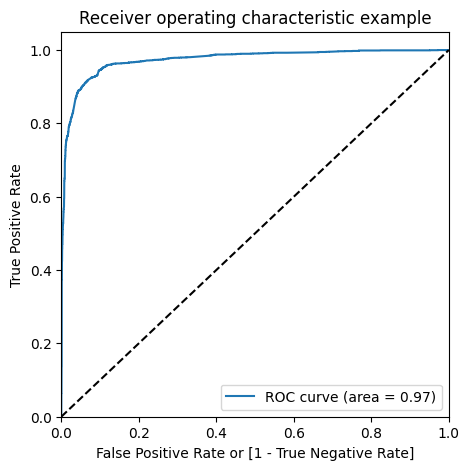

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

With a higher area under the ROC curve (0.97), our model is considered good.

**Determining the Optimal Cutoff Point:**

Previously, an arbitrary cutoff value of 0.5 was chosen. Now, we aim to identify the best cutoff value for optimal performance, ensuring a balance between sensitivity and specificity.

### Determining the Optimal Cutoff Point


In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003191,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.836870,6795,1,1,1,1,1,1,1,1,1,1,0
2,0,0.003825,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.159449,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.359267,3934,0,1,1,1,1,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.869666  0.967153  0.809595
0.2   0.2  0.912956  0.953771  0.887806
0.3   0.3  0.918058  0.929440  0.911044
0.4   0.4  0.927489  0.911192  0.937531
0.5   0.5  0.928881  0.893350  0.950775
0.6   0.6  0.929499  0.879968  0.960020
0.7   0.7  0.916048  0.827656  0.970515
0.8   0.8  0.905226  0.781833  0.981259
0.9   0.9  0.885127  0.715734  0.989505


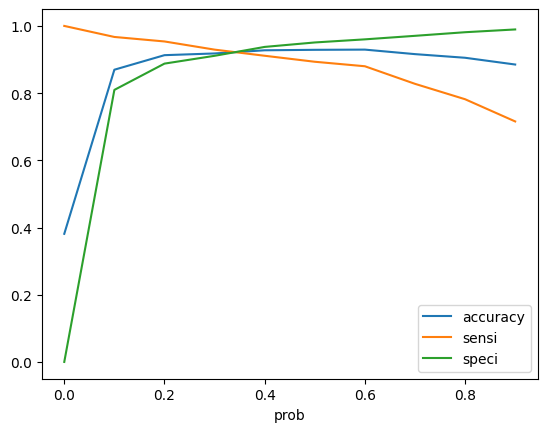

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Based on the curve presented, the optimal cutoff probability is determined to be 0.38.

In [ ]:
# Based on the curve presented, the optimal cutoff probability is determined to be 0.38

# Finding the final 'y_train_pred'
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.003191,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.836870,6795,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.003825,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.159449,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.359267,3934,0,1,1,1,1,0,0,0,0,0,0,0


### Assigning Lead Score

In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.003191,1871,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.836870,6795,1,1,1,1,1,1,1,1,1,1,0,1,84
2,0,0.003825,3516,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.159449,8105,0,1,1,0,0,0,0,0,0,0,0,0,16
4,0,0.359267,3934,0,1,1,1,1,0,0,0,0,0,0,0,36


In [ ]:
# checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Checking the sensitivity of final logistic regression model
TP / float(TP+FN)

0.9136253041362531

In [ ]:
# Checking the specificity
TN / float(TN+FP)

0.935032483758121

In [ ]:
# Computing the false positive rate, which involves predicting churn when the customer has not actually churned
print(FP/ float(TN+FP))

0.06496751624187906


In [ ]:
# Positive predictive value
print(TP / float(TP+FP))

0.8965380023875845


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9461441213653603


### Precision and Recall


Precision, also termed Positive Predictive Value, denotes the proportion of relevant results among the predicted positive outcomes.

Recall, also referred to as Sensitivity, represents the percentage of total relevant results accurately classified by the algorithm.

In [ ]:
#Checking confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3805,  197],
       [ 263, 2203]])

In [ ]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9179166666666667

In [ ]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8933495539334956

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculating precision score
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9179166666666667

In [ ]:
# Calculating recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8933495539334956

#### Precision and Recall Tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

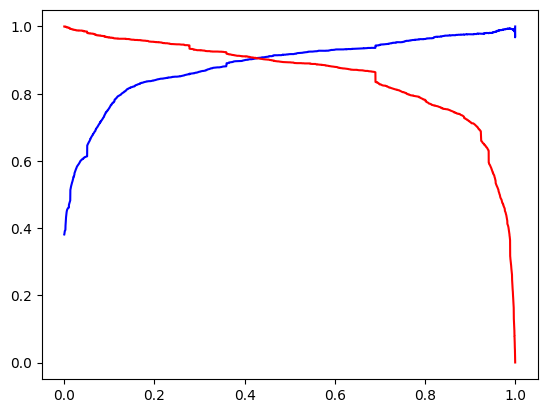

In [ ]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The graph above illustrates the trade-off between Precision and Recall.

### Making predictions on the test set


In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.662077,-0.691418,0.143543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.662077,1.365219,1.553761,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
X_test = X_test[col8]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Email Bounced,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Modified
4269,0.933036,0,0,1,0,0,0,0,1,1,0,0
2376,-0.900812,1,0,1,0,0,0,0,1,0,0,0
7766,-0.793792,0,0,0,0,0,0,0,1,0,1,0
9199,-0.900812,0,0,0,0,0,0,0,0,0,0,1
4359,-0.900812,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

4269    0.678683
2376    0.988495
7766    0.894766
9199    0.002554
4359    0.922763
9186    0.978092
1631    0.924664
8963    0.775768
8007    0.023259
5324    0.953932
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

,0
4269,0.678683
2376,0.988495
7766,0.894766
9199,0.002554
4359,0.922763


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.678683
1,1,2376,0.988495
2,1,7766,0.894766
3,0,9199,0.002554
4,1,4359,0.922763


In [ ]:
# Renaming column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [ ]:
# Rearranging the columns
columns_titles = ['Prospect ID','Converted','Converted_prob']
y_pred_final=y_pred_final.reindex(columns=columns_titles)

In [ ]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,4269,1,0.678683
1,2376,1,0.988495
2,7766,1,0.894766
3,9199,0,0.002554
4,4359,1,0.922763


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

In [ ]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,4269,1,0.678683,1
1,2376,1,0.988495,1
2,7766,1,0.894766,1
3,9199,0,0.002554,0
4,4359,1,0.922763,1


### Checking the overall Accuracy

In [ ]:
# Checking final accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9184704184704184

In [ ]:
# remaking the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1494,  183],
       [  43, 1052]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

Calculating Sensitivity of the final Logistic Regression Model

In [ ]:
TP / float(TP+FN)

0.960730593607306

Calculating Specificity of the final Model

In [ ]:
TN / float(TN+FP)

0.8908765652951699

**Observations:**

After running the model on the Train Dataset these are the figures we obtain:

* Accuracy : 92.89%
* Sensitivity : 89.33%
* Specificity : 95.07%

After running the model on the Test Dataset these are the figures we obtain:

* Accuracy : 91.85%
* Sensitivity : 96.07%
* Specificity : 89.08%